In [33]:
import ipywidgets as widgets
import sys
from pathlib import Path
import os
import importlib


module_path='preprocessing/day_intervals_preproc'
if module_path not in sys.path:
    sys.path.append(module_path)

module_path='utils'
if module_path not in sys.path:
    sys.path.append(module_path)
    
module_path='preprocessing/hosp_module_preproc'
if module_path not in sys.path:
    sys.path.append(module_path)
    
module_path='model'
if module_path not in sys.path:
    sys.path.append(module_path)
#print(sys.path)
root_dir = os.path.dirname(os.path.abspath('UserInterface.ipynb'))
import day_intervals_cohort
from day_intervals_cohort import *
import data_generation_icu

import data_generation
import evaluation

import feature_selection_hosp
from feature_selection_hosp import *

# import train
# from train import *

import ml_models
from ml_models import *

import dl_train
from dl_train import *

import feature_selection_icu
from feature_selection_icu import *
import fairness
import callibrate_output

In [35]:
importlib.reload(day_intervals_cohort)
import day_intervals_cohort
from day_intervals_cohort import *

importlib.reload(data_generation_icu)
import data_generation_icu
importlib.reload(data_generation)
import data_generation

importlib.reload(feature_selection_hosp)
import feature_selection_hosp
from feature_selection_hosp import *

importlib.reload(feature_selection_icu)
import feature_selection_icu
from feature_selection_icu import *

# importlib.reload(train)
# import train
# from train import *

importlib.reload(ml_models)
import ml_models
from ml_models import *

importlib.reload(dl_train)
import dl_train
from dl_train import *

importlib.reload(fairness)
import fairness

importlib.reload(callibrate_output)
import callibrate_output

importlib.reload(evaluation)
import evaluation

# Welcome to your MIMIC-IV Project

This repository explains the steps to download and clean MIMIC-IV dataset for analysis.

Please go to https://physionet.org/content/mimiciv/1.0/

Follow instructions to get access to MIMIC-IV dataset.

Download the files using your terminal: wget -r -N -c -np --user mehakg --ask-password https://physionet.org/files/mimiciv/1.0/

Save downloaded files in the parent directory of this github repo. 

The structure should look like -
- mimic-iv-1.0/core
- mimic-iv-1.0/hosp
- mimic-iv-1.0/icu

## 1. DATA EXTRACTION
Please run below cell to select option for cohort selection.
The cohort will be svaed in **./data/cohort/**

In [4]:
print("Extract Data")
print("Please select below if you want to work with ICU or Non-ICU data ?")
radio_input1 = widgets.RadioButtons(options=['ICU', 'Non-ICU'],value='ICU')
display(radio_input1)
      
print("Please select what prediction task you want to perform ?")
radio_input2 = widgets.RadioButtons(options=['Mortality','Length of Stay ge 3','Length of Stay ge 7','30 Day Readmission','60 Day Readmission','90 Day Readmission','120 Day Readmission','Heart Failure in 30 days','CAD in 30 days','CKD in 30 days','COPD in 30 days'],value='30 Day Readmission')
display(radio_input2)
      
print("Please select if you want to perform choosen prediction task for a specific disease.")
radio_input3 = widgets.RadioButtons(options=['No Disease Filter','Heart Failure','CKD','CAD','COPD'],value='No Disease Filter')
display(radio_input3)
print("**Please run below cell to extract the cohort for selected options**")

Extract Data
Please select below if you want to work with ICU or Non-ICU data ?


RadioButtons(options=('ICU', 'Non-ICU'), value='ICU')

Please select what prediction task you want to perform ?


RadioButtons(index=3, options=('Mortality', 'Length of Stay ge 3', 'Length of Stay ge 7', '30 Day Readmission'…

Please select if you want to perform choosen prediction task for a specific disease.


RadioButtons(options=('No Disease Filter', 'Heart Failure', 'CKD', 'CAD', 'COPD'), value='No Disease Filter')

**Please run below cell to extract the cohort for selected options**


In [5]:
disease_label=""
label=radio_input2.value
if radio_input2.value=='Heart Failure in 30 days':
    label='30 Day Readmission'
    disease_label='I50'
elif radio_input2.value=='CAD in 30 days':
    label='30 Day Readmission'
    disease_label='I25'
elif radio_input2.value=='CKD in 30 days':
    label='30 Day Readmission'
    disease_label='N18'
elif radio_input2.value=='COPD in 30 days':
    label='30 Day Readmission'
    disease_label='J44'
    
data_icu=radio_input1.value=="ICU"
data_mort=radio_input2.value=="Mortality"
data_admn=label[-11:]=='Readmission'
if label=='Length of Stay ge 3' or label=='Length of Stay ge 7':
        data_los=True
else:
    data_los=False    

if (radio_input3.value=="Heart Failure"):
    icd_code='I50'
elif (radio_input3.value=="CKD"):
    icd_code='N18'
elif (radio_input3.value=="COPD"):
    icd_code='J44'
elif (radio_input3.value=="CAD"):
    icd_code='I25'
else:
    icd_code='No Disease Filter'

cohort_output = extract_data(radio_input1.value,label,icd_code, root_dir,disease_label)

EXTRACTING FOR: | ICU | 30 DAY READMISSION DUE TO I50 | ADMITTED DUE TO N18 |
[ READMISSION DUE TO I50 ]


100%|██████████| 12222/12222 [02:16<00:00, 89.37it/s] 


[ READMISSION LABELS FINISHED ]
[ COHORT SUCCESSFULLY SAVED ]
[ SUMMARY SUCCESSFULLY SAVED ]
30 Day Readmission FOR ICU DATA
# Admission Records: 8037
# Patients: 4991
# Positive cases: 1461
# Negative cases: 6576


## 2. FEATURE SELECTION
Features available for ICU data -
- Diagnosis (https://mimic.mit.edu/docs/iv/modules/hosp/diagnoses_icd/)
- Procedures (https://mimic.mit.edu/docs/iv/modules/icu/procedureevents/)
- Medications (https://mimic.mit.edu/docs/iv/modules/icu/inputevents/)
- Output Events (https://mimic.mit.edu/docs/iv/modules/icu/outputevents/)
- Chart Events (https://mimic.mit.edu/docs/iv/modules/icu/chartevents/)

Features available for ICU data -
- Diagnosis (https://mimic.mit.edu/docs/iv/modules/hosp/diagnoses_icd/)
- Procedures (https://mimic.mit.edu/docs/iv/modules/hosp/procedures_icd/)
- Medications (https://mimic.mit.edu/docs/iv/modules/hosp/prescriptions/)
- Lab Events (https://mimic.mit.edu/docs/iv/modules/hosp/labevents/)

All features will be saved in **./data/features/**

**Please run below cell to select features**

In [7]:
print("Feature Selection")
if data_icu:
    print("Which Features you want to include for cohort?")
    check_input1 = widgets.Checkbox(description='Diagnosis')
    display(check_input1)
    check_input2 = widgets.Checkbox(description='Output Events')
    display(check_input2)
    check_input3 = widgets.Checkbox(description='Chart Events')
    display(check_input3)
    check_input4 = widgets.Checkbox(description='Procedures')
    display(check_input4)
    check_input5 = widgets.Checkbox(description='Medications')
    display(check_input5)
else:
    print("Which Features you want to include for cohort?")
    check_input1 = widgets.Checkbox(description='Diagnosis')
    display(check_input1)
    check_input2 = widgets.Checkbox(description='Labs')
    display(check_input2)
    check_input3 = widgets.Checkbox(description='Procedures')
    display(check_input3)
    check_input4 = widgets.Checkbox(description='Medications')
    display(check_input4)
print("**Please run below cell to extract selected features**")

Feature Selection
Which Features you want to include for cohort?


Checkbox(value=False, description='Diagnosis')

Checkbox(value=False, description='Output Events')

Checkbox(value=False, description='Chart Events')

Checkbox(value=False, description='Procedures')

Checkbox(value=False, description='Medications')

**Please run below cell to extract selected features**


In [8]:
if data_icu:
    diag_flag=check_input1.value
    out_flag=check_input2.value
    chart_flag=check_input3.value
    proc_flag=check_input4.value
    med_flag=check_input5.value
    feature_icu(cohort_output, diag_flag,out_flag,chart_flag,proc_flag,med_flag)
else:
    diag_flag=check_input1.value
    lab_flag=check_input2.value
    proc_flag=check_input3.value
    med_flag=check_input4.value
    feature_nonicu(cohort_output, diag_flag,lab_flag,proc_flag,med_flag)

[EXTRACTING DIAGNOSIS DATA]
# unique ICD-9 codes 2823
# unique ICD-10 codes 3861
# unique ICD-10 codes (After converting ICD-9 to ICD-10) 4173
# unique ICD-10 codes (After clinical gruping ICD-10 codes) 1007
# Admissions:   8037
Total rows 197334


0it [00:00, ?it/s]

[SUCCESSFULLY SAVED DIAGNOSIS DATA]
[EXTRACTING CHART EVENTS DATA]


33it [05:54, 10.73s/it]


# Unique Events:   398
# Admissions:   8037
Total rows 9026852
[SUCCESSFULLY SAVED CHART EVENTS DATA]


## 3. CLINICAL GROUPING
Below you will have option to clinically group diagnosis and medications.

**Please run below cell to select preprocessing for diferent features**

In [9]:
if data_icu:
    if diag_flag:
        print("Do you want to group ICD 10 DIAG codes ?")
        radio_input4 = widgets.RadioButtons(options=['Keep both ICD-9 and ICD-10 codes','Convert ICD-9 to ICD-10 codes','Convert ICD-9 to ICD-10 and group ICD-10 codes'],value='Convert ICD-9 to ICD-10 and group ICD-10 codes')
        display(radio_input4)   
    
else:
    if diag_flag:
        print("Do you want to group ICD 10 DIAG codes ?")
        radio_input4 = widgets.RadioButtons(options=['Keep both ICD-9 and ICD-10 codes','Convert ICD-9 to ICD-10 codes','Convert ICD-9 to ICD-10 and group ICD-10 codes'],value='Keep both ICD-9 and ICD-10 codes')
        display(radio_input4)     
    if med_flag:
        print("Do you want to group Medication codes to use Non propietary names?")
        radio_input5 = widgets.RadioButtons(options=['Yes','No'],value='Yes')
        display(radio_input5)
    if proc_flag:
        print("Which ICD codes for Procedures you want to keep in data?")
        radio_input6 = widgets.RadioButtons(options=['ICD-9 and ICD-10','ICD-10'],value='ICD-9 and ICD-10')
        display(radio_input6)
print("**Please run below cell to perform feature preprocessing**")

Do you want to group ICD 10 DIAG codes ?


RadioButtons(index=2, options=('Keep both ICD-9 and ICD-10 codes', 'Convert ICD-9 to ICD-10 codes', 'Convert I…

**Please run below cell to perform feature preprocessing**


In [10]:
group_diag=False
group_med=False
group_proc=False
if data_icu:
    if diag_flag:
        group_diag=radio_input4.value
    preprocess_features_icu(cohort_output, diag_flag, group_diag,False,False,False)
else:
    if diag_flag:
        group_diag=radio_input4.value
    if med_flag:
        group_med=radio_input5.value
    if proc_flag:
        group_proc=radio_input6.value
    preprocess_features_hosp(cohort_output, diag_flag,proc_flag,med_flag,False,group_diag,group_med,group_proc,False,False)

[PROCESSING DIAGNOSIS DATA]
Total number of rows 189588
[SUCCESSFULLY SAVED DIAGNOSIS DATA]


### 4. SUMMARY OF FEATURES

This step will generate summary of all features extracted so far.<br>
It will save summary files in **./data/summary/**<br>
- These files provide summary about **mean frequency** of medical codes per admission.<br>
- It also provides **total occurrence count** of each medical code.<br>
- For labs and chart events it will also provide <br>**missing %** which tells how many rows for a certain medical code has missing value.

Please use this information to further refine your cohort by selecting <br>which medical codes in each feature you want to keep and <br>which codes you would like to remove for downstream analysis tasks.

**Please run below cell to generate summary files**

In [15]:
if data_icu:
    generate_summary_icu(diag_flag,proc_flag,med_flag,out_flag,chart_flag)
else:
    generate_summary_hosp(diag_flag,proc_flag,med_flag,lab_flag)

[GENERATING FEATURE SUMMARY]


2it [00:18,  9.23s/it]


[SUCCESSFULLY SAVED FEATURE SUMMARY]


## 5. Feature Selection

based on the files generated in previous step and other infromation gathered by you,<br>
Please select which medical codes you want to include in this study.

Please run below cell to to select options for which features you want to perform feature selection.

- Select **Yes** if you want to select a subset of medical codes for that feature and<br> **edit** the corresponding feature file for it.
- Select **No** if you want to keep all the codes in a feature.

In [11]:
if data_icu:
    if diag_flag:
        print("Do you want to do Feature Selection for Diagnosis \n (If yes, please edit list of codes in ./data/summary/diag_features.csv)")
        radio_input4 = widgets.RadioButtons(options=['Yes','No'],value='No')
        display(radio_input4)       
    if med_flag:
        print("Do you want to do Feature Selection for Medication \n (If yes, please edit list of codes in ./data/summary/med_features.csv)")
        radio_input5 = widgets.RadioButtons(options=['Yes','No'],value='No')
        display(radio_input5)   
    if proc_flag:
        print("Do you want to do Feature Selection for Procedures \n (If yes, please edit list of codes in ./data/summary/proc_features.csv)")
        radio_input6 = widgets.RadioButtons(options=['Yes','No'],value='No')
        display(radio_input6)   
    if out_flag:
        print("Do you want to do Feature Selection for Output event \n (If yes, please edit list of codes in ./data/summary/out_features.csv)")
        radio_input7 = widgets.RadioButtons(options=['Yes','No'],value='No')
        display(radio_input7)  
    if chart_flag:
        print("Do you want to do Feature Selection for Chart events \n (If yes, please edit list of codes in ./data/summary/chart_features.csv)")
        radio_input8 = widgets.RadioButtons(options=['Yes','No'],value='No')
        display(radio_input8)  
else:
    if diag_flag:
        print("Do you want to do Feature Selection for Diagnosis \n (If yes, please edit list of codes in ./data/summary/diag_features.csv)")
        radio_input4 = widgets.RadioButtons(options=['Yes','No'],value='No')
        display(radio_input4)         
    if med_flag:
        print("Do you want to do Feature Selection for Medication \n (If yes, please edit list of codes in ./data/summary/med_features.csv)")
        radio_input5 = widgets.RadioButtons(options=['Yes','No'],value='No')
        display(radio_input5)   
    if proc_flag:
        print("Do you want to do Feature Selection for Procedures \n (If yes, please edit list of codes in ./data/summary/proc_features.csv)")
        radio_input6 = widgets.RadioButtons(options=['Yes','No'],value='No')
        display(radio_input6)   
    if lab_flag:
        print("Do you want to do Feature Selection for Labs \n (If yes, please edit list of codes in ./data/summary/lab_features.csv)")
        radio_input7 = widgets.RadioButtons(options=['Yes','No'],value='No')
        display(radio_input7)   
print("**Please run below cell to perform feature selection**")

Do you want to do Feature Selection for Diagnosis 
 (If yes, please edit list of codes in ./data/summary/diag_features.csv)


RadioButtons(index=1, options=('Yes', 'No'), value='No')

Do you want to do Feature Selection for Chart events 
 (If yes, please edit list of codes in ./data/summary/chart_features.csv)


RadioButtons(index=1, options=('Yes', 'No'), value='No')

**Please run below cell to perform feature selection**


In [12]:
select_diag=False
select_med=False
select_proc=False
select_lab=False
select_out=False
select_chart=False

if data_icu:
    if diag_flag:
        select_diag=radio_input4.value == 'Yes'
    if med_flag:
        select_med=radio_input5.value == 'Yes'
    if proc_flag:
        select_proc=radio_input6.value == 'Yes'
    if out_flag:
        select_out=radio_input7.value == 'Yes'
    if chart_flag:
        select_chart=radio_input8.value == 'Yes'
    features_selection_icu(cohort_output, diag_flag,proc_flag,med_flag,out_flag, chart_flag,select_diag,select_med,select_proc,select_out,select_chart)
else:
    if diag_flag:
        select_diag=radio_input4.value == 'Yes'
    if med_flag:
        select_med=radio_input5.value == 'Yes'
    if proc_flag:
        select_proc=radio_input6.value == 'Yes'
    if lab_flag:
        select_lab=radio_input7.value == 'Yes'
    features_selection_hosp(cohort_output, diag_flag,proc_flag,med_flag,lab_flag,select_diag,select_med,select_proc,select_lab)

[FEATURE SELECTION CHART EVENTS DATA]
Total number of rows 2187213
[SUCCESSFULLY SAVED CHART EVENTS DATA]


## 6. CLEANING OF FEATURES
Below you will have option to to clean lab and chart events by performing outlier removal and unit conversion.

Outlier removal is performed to remove values higher than 0.95 percentile among all values for a particular itemid. 

**Please run below cell to select preprocessing for diferent features**

In [14]:
if data_icu:
    if chart_flag:
        print("Outlier removal in values of chart events ?")
        radio_input5 = widgets.RadioButtons(options=['No outlier detection','Impute Outlier values with 98% threshold','Remove records with outlier values using 98% threshold'],value='No outlier detection')
        display(radio_input5)
    
else:      
    if lab_flag:
        print("Outlier removal in values of lab events ?")
        radio_input7 = widgets.RadioButtons(options=['No outlier detection','Impute Outlier values with 98% threshold','Remove records with outlier values using 98% threshold'],value='No outlier detection')
        display(radio_input7)
print("**Please run below cell to perform feature preprocessing**")

Outlier removal in values of chart events ?


RadioButtons(options=('No outlier detection', 'Impute Outlier values with 98% threshold', 'Remove records with…

**Please run below cell to perform feature preprocessing**


In [15]:
if data_icu:
    if chart_flag:
        clean_chart=radio_input5.value!='No outlier detection'
        impute_outlier_chart=radio_input5.value=='Impute Outlier values with 95% threshold'
    preprocess_features_icu(cohort_output, False, False,chart_flag,clean_chart,impute_outlier_chart)
else:
    if proc_flag:
        group_proc=radio_input6.value
    if lab_flag:
        clean_lab=radio_input7.value!='No outlier detection'
        impute_outlier=radio_input7.value=='Impute Outlier values with 95% threshold'
    preprocess_features_hosp(cohort_output, False,False,False,lab_flag,False,False,False,clean_lab,impute_outlier)

[PROCESSING CHART EVENTS DATA]
Total number of rows 2107602
[SUCCESSFULLY SAVED CHART EVENTS DATA]


## 7. Time-Series Representation
In this section, please choose how you want to process and represent time-series data.

- First option is to select the length of time-series data you want to include for this study. (Default is 72 hours)

- Second option is to select bucket size which tells in what size time windows you want to divide your time-series.<br>
For example, if you select **2** bucket size, it wil aggregate data for every 2 hours and <br>a time-series of length 24 hours will be represented as time-series with 12 time-windows <br>where data for every 2 hours is agggregated from original raw time-series.

During this step, we will also save the time-series data in data dictionaries in the format that can be directly used for following deep learning analysis.

### Imputation
You can also choose if you want to impute lab/chart values. The imputation will be done by froward fill and mean imputation.<br>
Values will be forward fill first and if no value exists for that admission we will use mean value for the patient.

The data dictionaries will be saved in **./data/dict/**

Please refer the readme to know the structure of data dictionaries.

**Please run below cell to select time-series representation**

In [16]:
print("=======Time-series Data Represenation=======")

print("Length of data to be included for time-series prediction ?")
if(data_mort):
    radio_input8 = widgets.RadioButtons(options=['First 72 hours','First 48 hours','First 24 hours','Custom'],value='First 72 hours')
    display(radio_input8)
    text2=widgets.IntText(
        value=72,
        description='Last',
        disabled=False
    )
    display(text2)
elif(data_admn):
    radio_input8 = widgets.RadioButtons(options=['Last 72 hours','Last 48 hours','Last 24 hours','Custom'],value='Last 72 hours')
    display(radio_input8)
    text2=widgets.IntText(
        value=72,
        description='Last',
        disabled=False
    )
    display(text2)
elif(data_los):
    radio_input8 = widgets.RadioButtons(options=['First 12 hours','First 24 hours'],value='First 24 hours')
    display(radio_input8)
    
    
print("What time bucket size you want to choose ?")
radio_input7 = widgets.RadioButtons(options=['1 hour','2 hour','3 hour','4 hour','5 hour','Custom'],value='1 hour')
display(radio_input7)
text1=widgets.IntText(
    value=1,
    description='Bucket Size (in hours):',
    disabled=False
)
display(text1)
print("Do you want to forward fill nd mean impute lab/chart values to form continuous data signal?")
radio_impute = widgets.RadioButtons(options=['Yes','No'],value='Yes')
display(radio_impute)   

radio_input6 = widgets.RadioButtons(options=['0 hours','2 hours','4 hours','6 hours'],value='0 hours')
if(data_mort):
    print("If you have choosen mortality prediction task, then what prediction window length you want to keep?")
    radio_input6 = widgets.RadioButtons(options=['2 hours','4 hours','6 hours','8 hours','Custom'],value='2 hours')
    display(radio_input6)
    text3=widgets.IntText(
    value=2,
    description='Prediction window (in hours)',
    disabled=False
    )
    display(text3)
print("**Please run below cell to perform time-series represenation and save in data dictionaries**")

=======Time-series Data Represenation=======
Length of data to be included for time-series prediction ?


RadioButtons(options=('Last 72 hours', 'Last 48 hours', 'Last 24 hours', 'Custom'), value='Last 72 hours')

IntText(value=72, description='Last')

What time bucket size you want to choose ?


RadioButtons(options=('1 hour', '2 hour', '3 hour', '4 hour', '5 hour', 'Custom'), value='1 hour')

IntText(value=1, description='Bucket Size (in hours):')

Do you want to forward fill nd mean impute lab/chart values to form continuous data signal?


RadioButtons(options=('Yes', 'No'), value='Yes')

**Please run below cell to perform time-series represenation and save in data dictionaries**


In [17]:
if (radio_input6.value=='Custom'):
    bucket=int(text3.value)
else:
    predW=int(radio_input7.value[0].strip())
if (radio_input7.value=='Custom'):
    bucket=int(text1.value)
else:
    bucket=int(radio_input7.value[0].strip())
if (radio_input8.value=='Custom'):
    include=int(text2.value)
else:
    include=int(radio_input8.value.split()[1])
impute=radio_impute.value=='Yes'
if data_icu:
    gen=data_generation_icu.Generator(cohort_output,data_mort,data_admn,data_los,diag_flag,proc_flag,out_flag,chart_flag,med_flag,impute,include,bucket,predW)
    #gen=data_generation_icu.Generator(cohort_output,data_mort,diag_flag,False,False,chart_flag,False,impute,include,bucket,predW)
    #if chart_flag:
    #    gen=data_generation_icu.Generator(cohort_output,data_mort,False,False,False,chart_flag,False,impute,include,bucket,predW)
else:
    gen=data_generation.Generator(cohort_output,data_mort,data_admn,data_los,diag_flag,lab_flag,proc_flag,med_flag,impute,include,bucket,predW)

0it [00:00, ?it/s]

[ READ COHORT ]
[ ======READING DIAGNOSIS ]
[ ======READING CHART EVENTS ]


1it [00:12, 12.75s/it]


[ READ ALL FEATURES ]


 33%|███▎      | 8/24 [00:00<00:00, 80.00it/s]

[ PROCESSED TIME SERIES TO EQUAL LENGTH  ]


100%|██████████| 24/24 [00:00<00:00, 59.26it/s]


bucket 2
[ PROCESSED TIME SERIES TO EQUAL TIME INTERVAL ]
24


100%|██████████| 4436/4436 [12:32<00:00,  5.89it/s]

[ SUCCESSFULLY SAVED DATA DICTIONARIES ]


## 8. Machine Learning Models

Below we provide options to select -
- Type of machine learning model
- Wheteher to concatenate or aggregate time-series features.
    For example, if the HER data has collected value for Blood Pressure for one year over 4 time windows of 3 months each then,
    - **Conactenate** will concatenate all four values resulting in 4 different features for blood pressure,
    - **Aggregate** will aggreagte(mean) over four tiem windows resulting in one feature for blood pressure.

In [18]:
print("=======Machine :earning Models=======")
radio_input5 = widgets.RadioButtons(options=['Logistic Regression','Random Forest','Gradient Bossting','Xgboost'],value='Gradient Bossting')
display(radio_input5)
print("Do you wnat to conactenate the time-series feature")
radio_input6 = widgets.RadioButtons(options=['Conactenate','Aggregate'],value='Conactenate')
display(radio_input6)
print("Please select below option for cross-validation")
radio_input7 = widgets.RadioButtons(options=['No CV','5-fold CV','10-fold CV'],value='5-fold CV')
display(radio_input7)
print("Do you want to do oversampling for minority calss ?")
radio_input8 = widgets.RadioButtons(options=['True','False'],value='True')
display(radio_input8)

=======Machine :earning Models=======


RadioButtons(index=2, options=('Logistic Regressin', 'Random Forest', 'Gradient Bossting', 'Xgboost'), value='…

Do you wnat to conactenate the time-series feature


RadioButtons(options=('Conactenate', 'Aggregate'), value='Conactenate')

Please select below option for cross-validation


RadioButtons(index=1, options=('No CV', '5-fold CV', '10-fold CV'), value='5-fold CV')

Do you want to do oversampling for minority calss ?


RadioButtons(options=('True', 'False'), value='True')

In [27]:
if radio_input7.value=='No CV':
    cv=0
elif radio_input7.value=='5-fold CV':
    cv=int(5)
elif radio_input7.value=='10-fold CV':
    cv=int(10)
ml=ml_models.ML_models(data_icu,cv,radio_input5.value,concat=radio_input6.value=='Conactenate',oversampling=radio_input8.value=='True')

Total Samples 4436
Positive Samples 837
=============OVERSAMPLING===============
Total Samples 7198
Positive Samples 3599
=================== 0 FOLD=====================


KeyboardInterrupt: 

## 9. Deep Learning Models
- Time-series LSTM and Time-series CNN which will only use time-series events like medications, charts, labs, output events to train model.

- Hybrid LSTM and Hybrid CNN will use static data - diagnosis, demographic data aong with other time-series data to train model.

- LSTM with Attention model will use attention layer to rank the important features and learn to predict output. It will use both static and time-series data.

**Go to ./model/parameter.py and define all variables needed for model building and training**

**Please run below cell to select which model to use**

In [6]:
radio_input6=widgets.RadioButtons(options=['Time-series LSTM','Time-series CNN','Hybrid LSTM','Hybrid CNN'],value='Time-series LSTM')
display(radio_input6)
print("Please select below option for cross-validation")
radio_input7 = widgets.RadioButtons(options=['No CV','5-fold CV','10-fold CV'],value='5-fold CV')
display(radio_input7)
print("Do you want to do oversampling for minority calss ?")
radio_input8 = widgets.RadioButtons(options=['True','False'],value='True')
display(radio_input8)

RadioButtons(options=('Time-series LSTM', 'Time-series CNN', 'Hybrid LSTM', 'Hybrid CNN'), value='Time-series …

Please select below option for cross-validation


RadioButtons(index=1, options=('No CV', '5-fold CV', '10-fold CV'), value='5-fold CV')

Do you want to do oversampling for minority calss ?


RadioButtons(options=('True', 'False'), value='True')

===============MODEL TRAINING===============
Total Samples 4436
Positive Samples 837
=============OVERSAMPLING===============
Total Samples 7198
Positive Samples 3599
[ MODEL CREATED ]
LSTMBase(
  (chart): ValEmbed(
    (codeEmbed): BatchNorm1d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (fc): Linear(in_features=32, out_features=152, bias=True)
  )
  (cond): StatEmbed(
    (codeEmbed): Embedding(913, 12)
    (fc): Linear(in_features=10956, out_features=152, bias=True)
  )
  (ethEmbed): Embedding(9, 152, padding_idx=0)
  (genderEmbed): Embedding(3, 152, padding_idx=0)
  (ageEmbed): Embedding(71, 152, padding_idx=0)
  (insEmbed): Embedding(4, 152, padding_idx=0)
  (embedfc): Linear(in_features=912, out_features=152, bias=True)
  (rnn): LSTM(152, 256, num_layers=2, batch_first=True)
  (fc1): Linear(in_features=256, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=1, bias=True)
)
=================== 0 FOLD=====================
======= E

BCE Loss: 1.38
AU-ROC: 0.54
AU-PRC: 0.21
AU-PRC Baaseline: 0.18
Accuracy: 0.55
Precision: 0.20
Recall: 0.48
Specificity: 0.56
NPV: 0.83
ECE: 0.31
MCE: 0.35
======= VALIDATION ========
BCE Loss: 1.37
AU-ROC: 0.59
AU-PRC: 0.58
AU-PRC Baaseline: 0.53
Accuracy: 0.56
Precision: 0.59
Recall: 0.51
Specificity: 0.62
NPV: 0.53
ECE: 0.06
MCE: 0.11
Validation results improved
Updating Model
======= EPOCH 1.0 ========
BCE Loss: 1.27
AU-ROC: 0.70
AU-PRC: 0.33
AU-PRC Baaseline: 0.18
Accuracy: 0.65
Precision: 0.30
Recall: 0.65
Specificity: 0.65
NPV: 0.89
ECE: 0.28
MCE: 0.58
======= VALIDATION ========
BCE Loss: 1.41
AU-ROC: 0.57
AU-PRC: 0.58
AU-PRC Baaseline: 0.53
Accuracy: 0.52
Precision: 0.56
Recall: 0.42
Specificity: 0.63
NPV: 0.50
ECE: 0.11
MCE: 0.20
No improvement in Validation results
======= EPOCH 2.0 ========
BCE Loss: 1.19
AU-ROC: 0.76
AU-PRC: 0.39
AU-PRC Baaseline: 0.18
Accuracy: 0.72
Precision: 0.36
Recall: 0.67
Specificity: 0.73
NPV: 0.91
ECE: 0.24
MCE: 0.49
======= VALIDATION ========
BC

BCE Loss: 1.07
AU-ROC: 0.81
AU-PRC: 0.44
AU-PRC Baaseline: 0.18
Accuracy: 0.75
Precision: 0.39
Recall: 0.76
Specificity: 0.74
NPV: 0.94
ECE: 0.24
MCE: 0.46
======= VALIDATION ========
BCE Loss: 1.58
AU-ROC: 0.54
AU-PRC: 0.58
AU-PRC Baaseline: 0.54
Accuracy: 0.49
Precision: 0.56
Recall: 0.30
Specificity: 0.72
NPV: 0.47
ECE: 0.20
MCE: 0.31
No improvement in Validation results
======= EPOCH 4.0 ========
BCE Loss: 1.07
AU-ROC: 0.81
AU-PRC: 0.43
AU-PRC Baaseline: 0.18
Accuracy: 0.75
Precision: 0.39
Recall: 0.77
Specificity: 0.74
NPV: 0.94
ECE: 0.20
MCE: 0.34
======= VALIDATION ========
BCE Loss: 1.53
AU-ROC: 0.54
AU-PRC: 0.58
AU-PRC Baaseline: 0.54
Accuracy: 0.53
Precision: 0.56
Recall: 0.54
Specificity: 0.50
NPV: 0.48
ECE: 0.15
MCE: 0.40
No improvement in Validation results
======= EPOCH 5.0 ========
BCE Loss: 0.99
AU-ROC: 0.84
AU-PRC: 0.49
AU-PRC Baaseline: 0.18
Accuracy: 0.75
Precision: 0.40
Recall: 0.81
Specificity: 0.74
NPV: 0.95
ECE: 0.22
MCE: 0.42
======= VALIDATION ========
BCE Loss

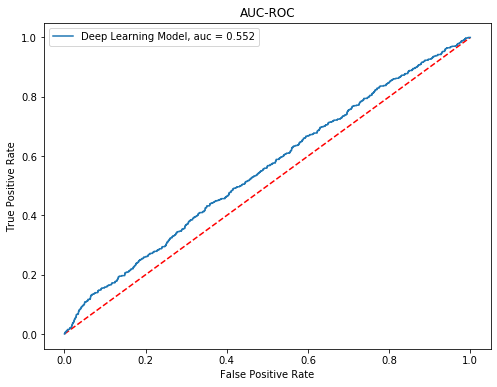

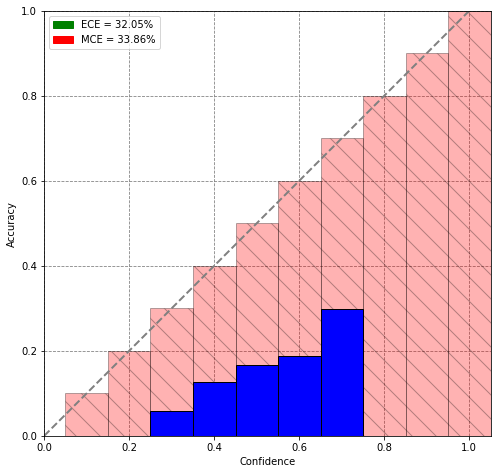

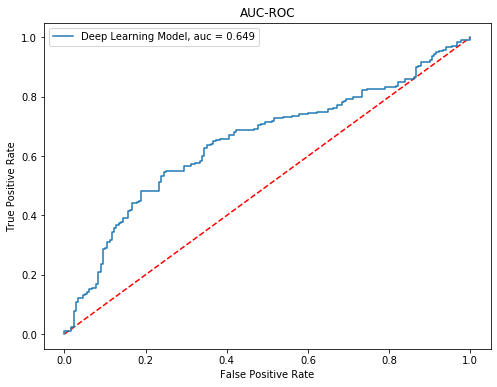

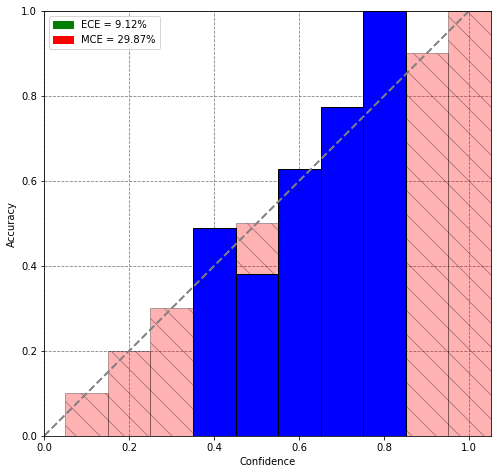

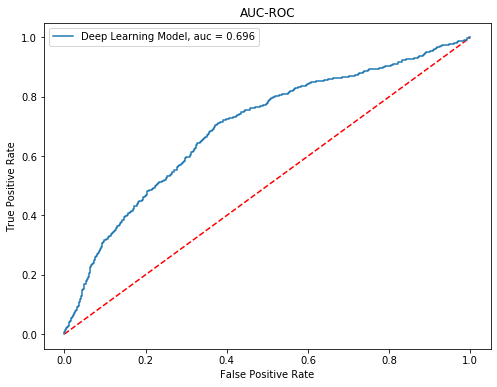

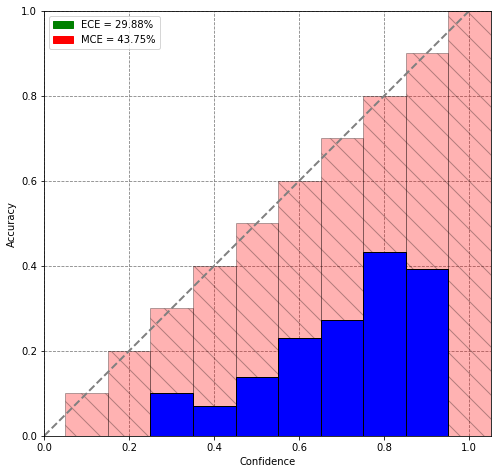

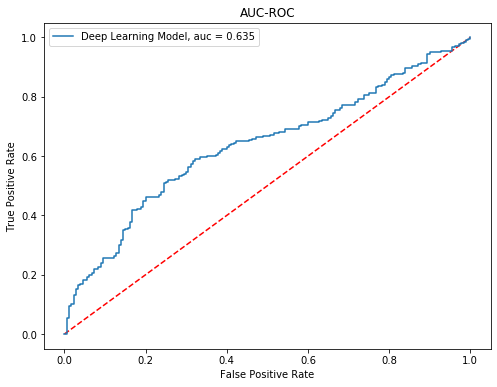

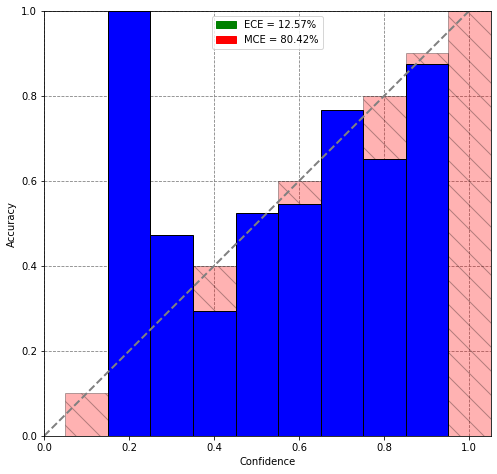

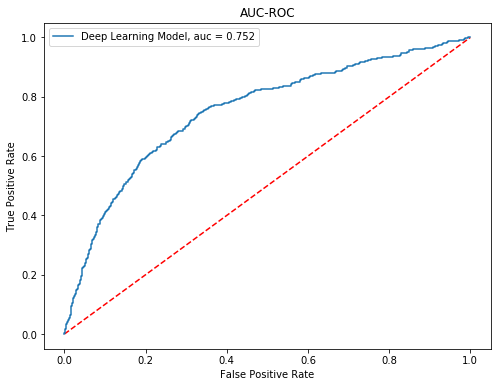

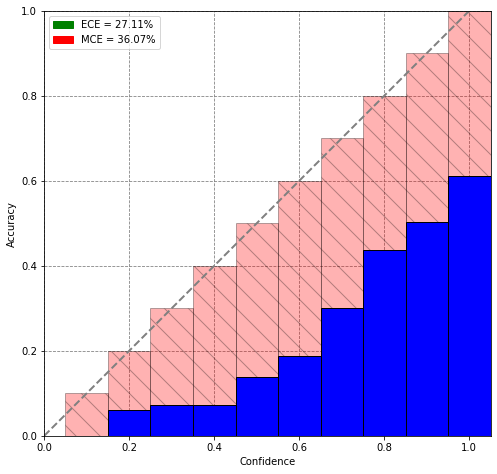

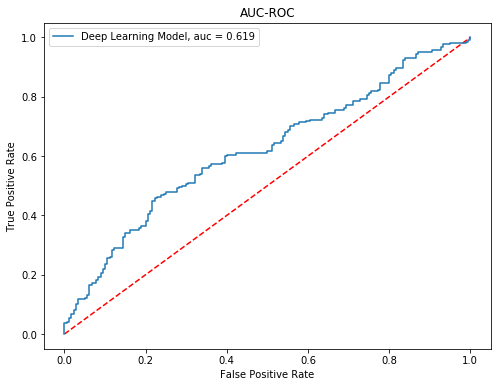

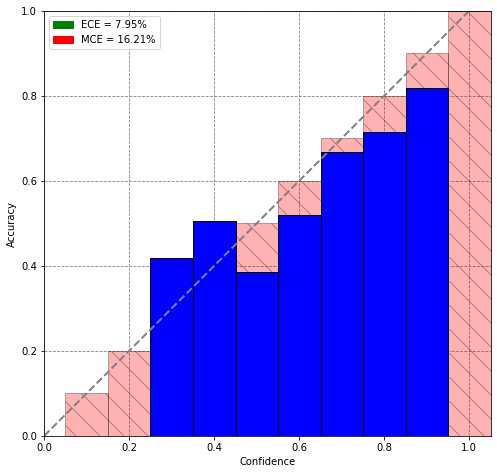

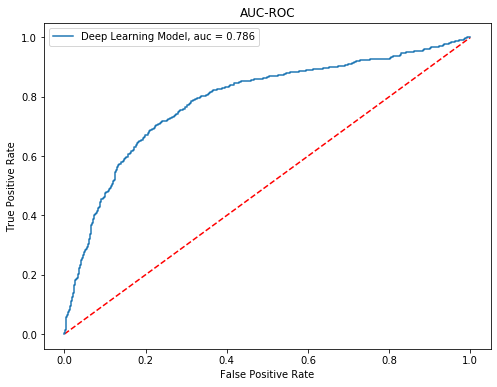

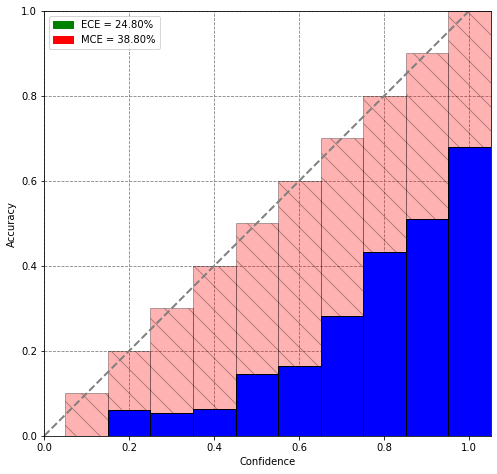

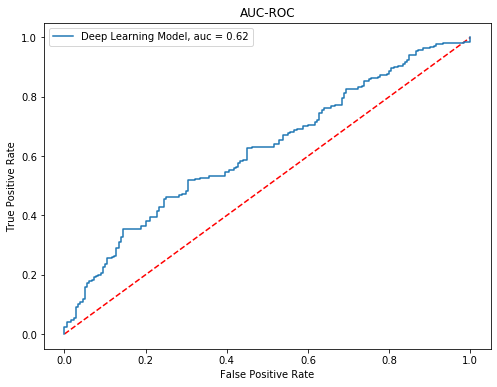

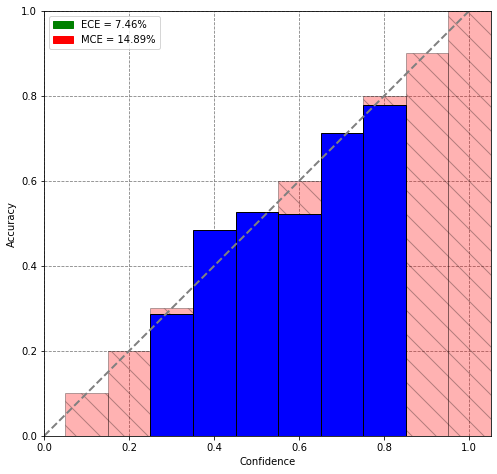

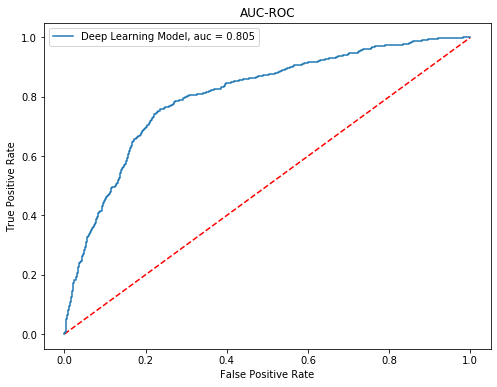

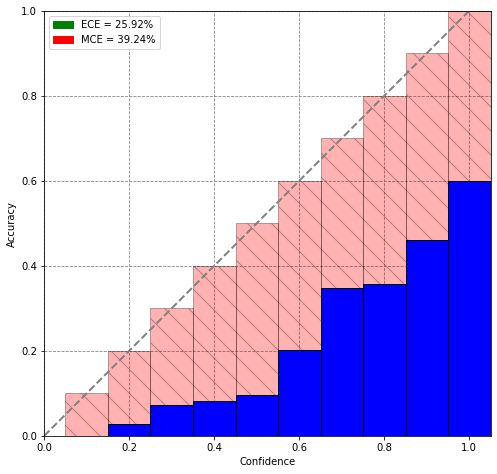

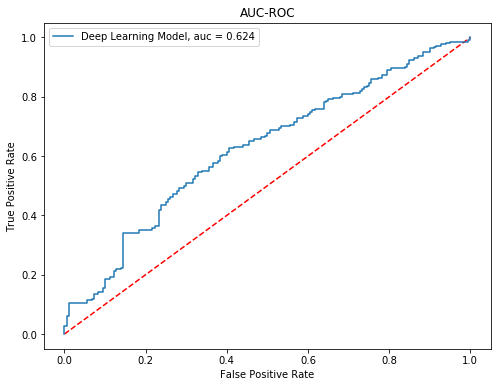

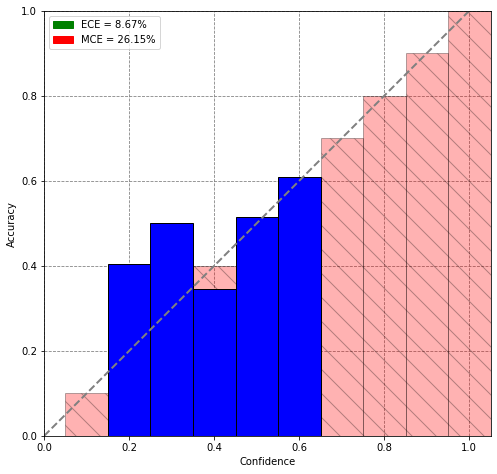

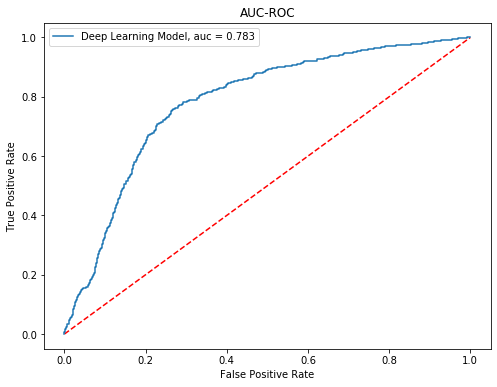

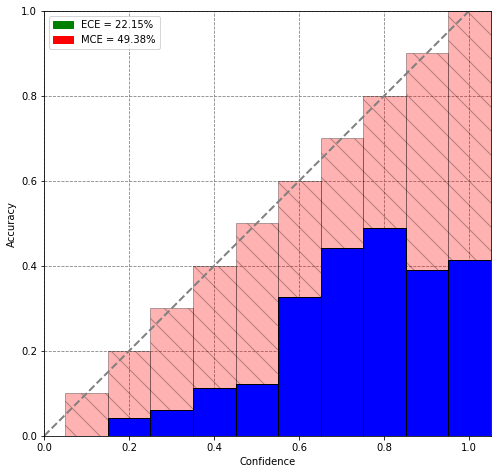

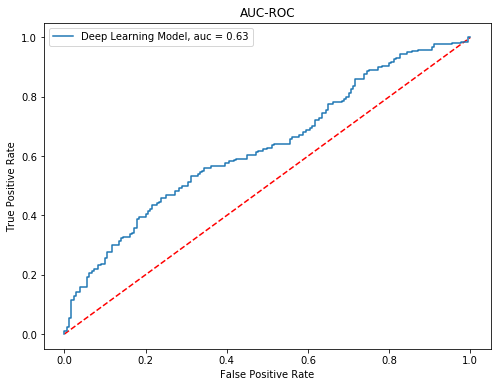

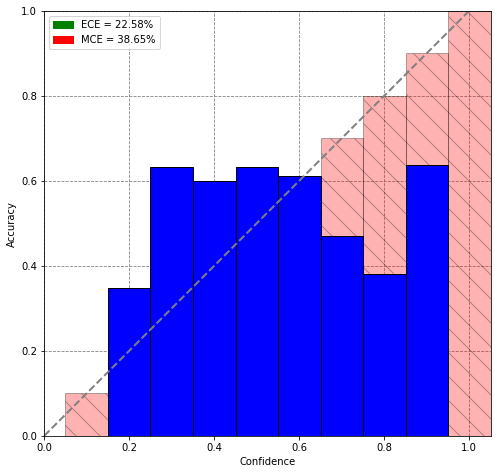

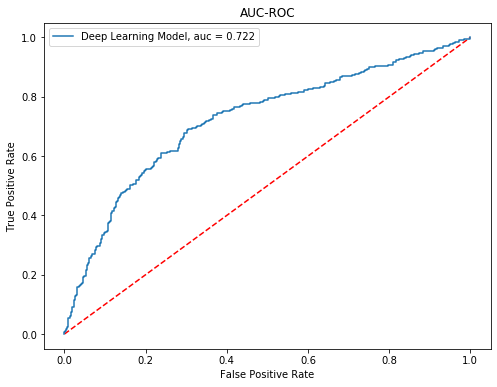

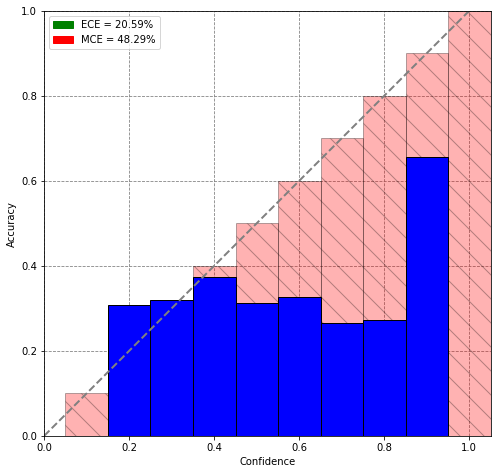

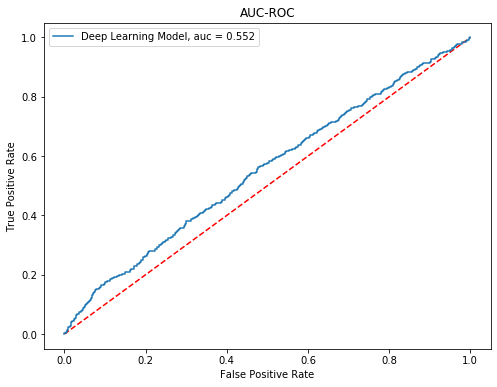

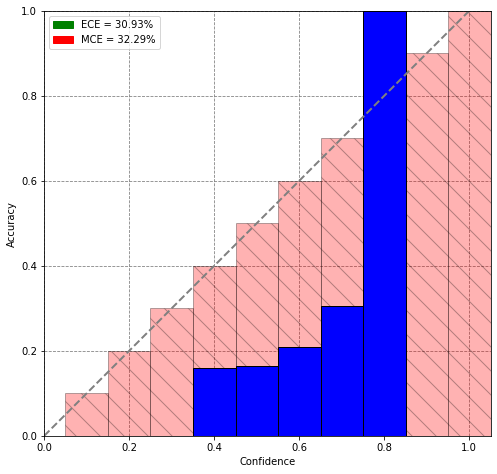

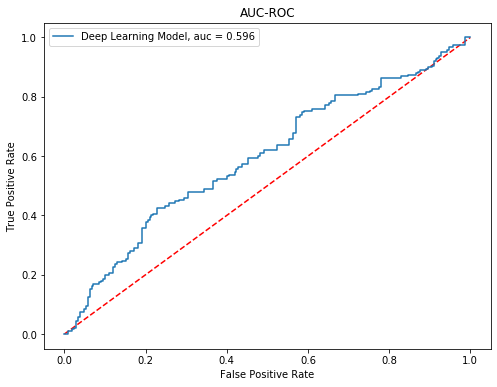

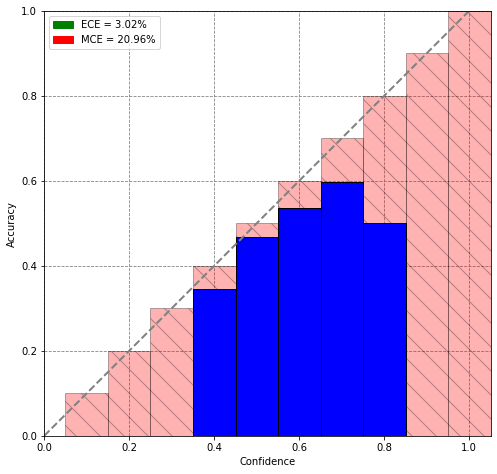

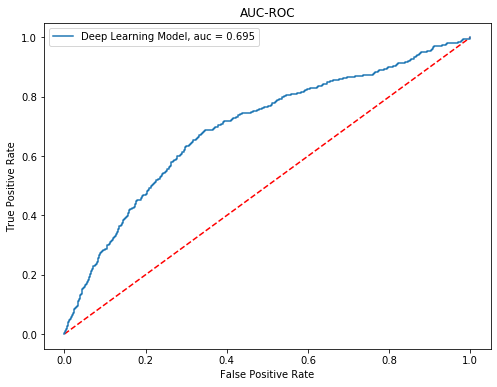

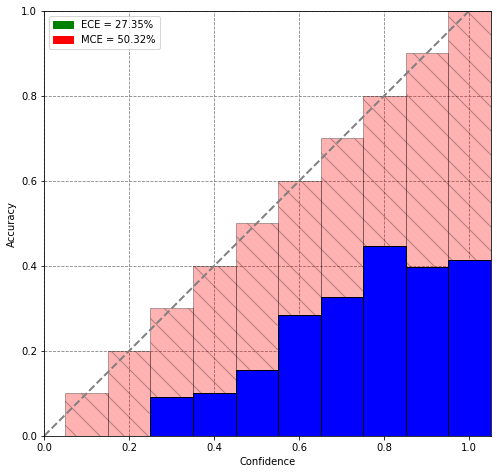

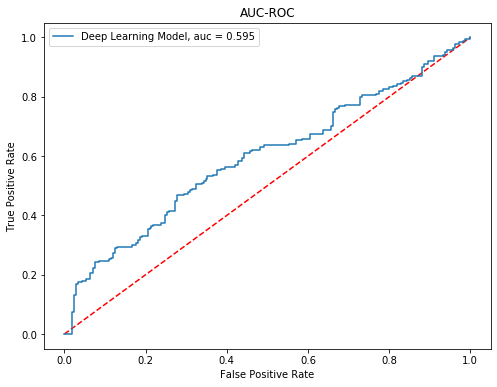

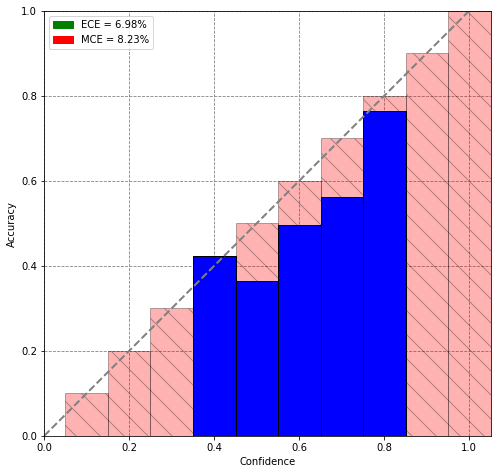

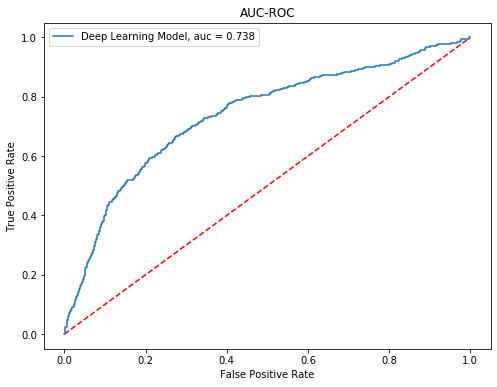

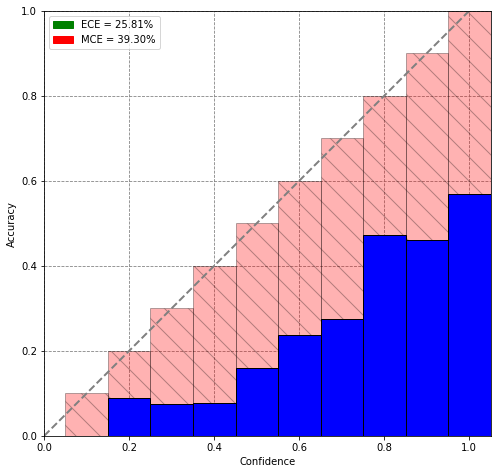

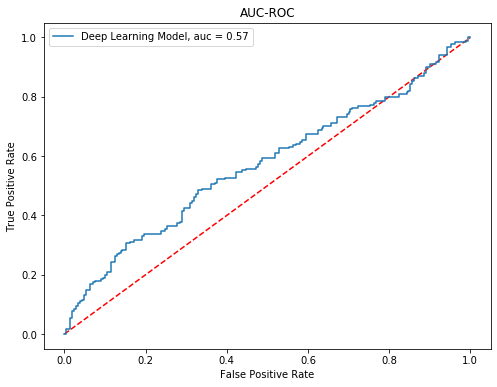

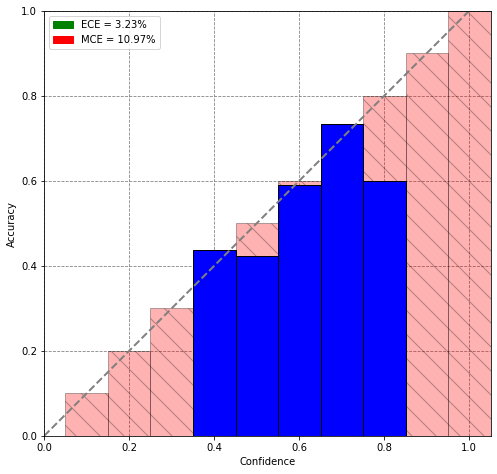

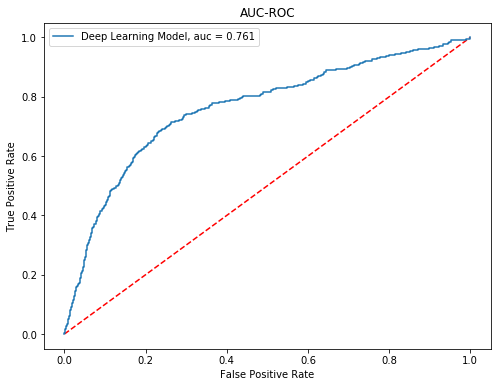

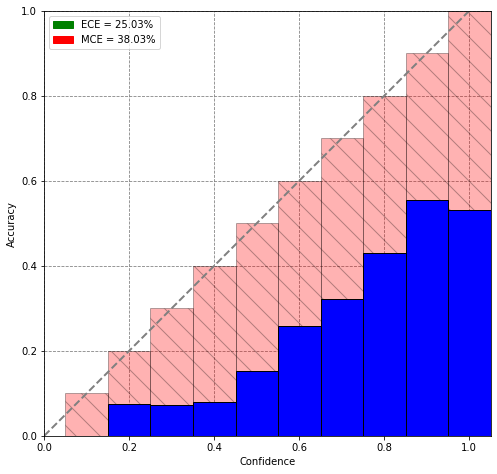

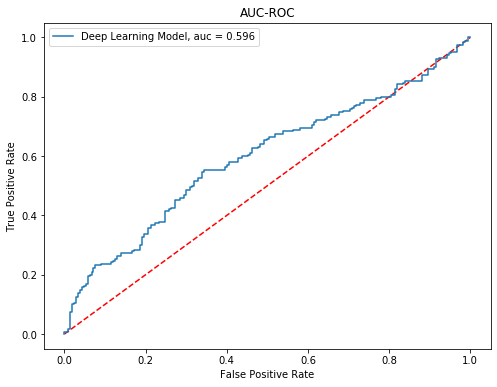

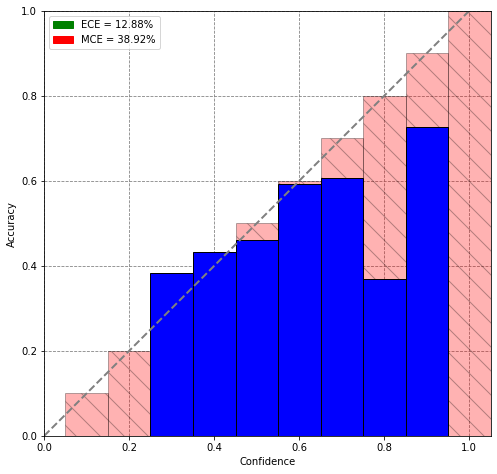

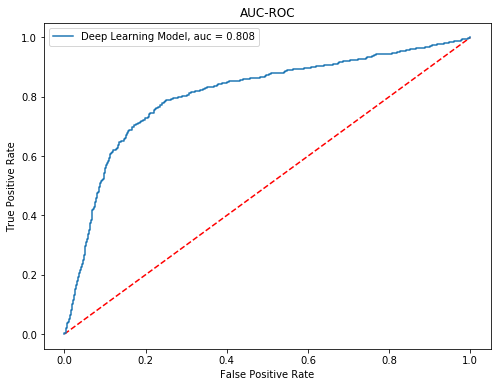

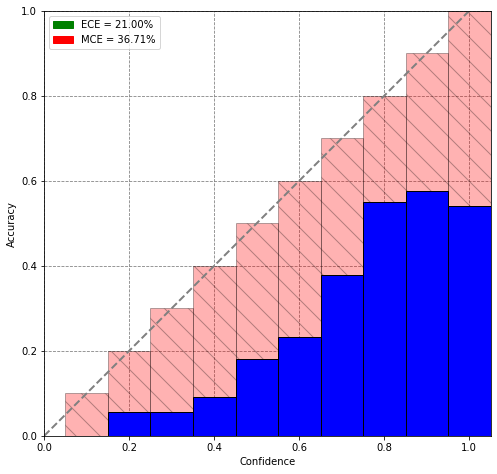

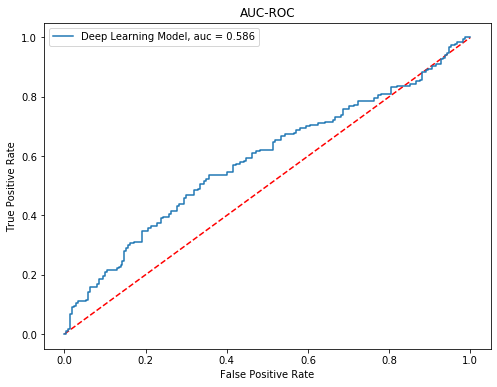

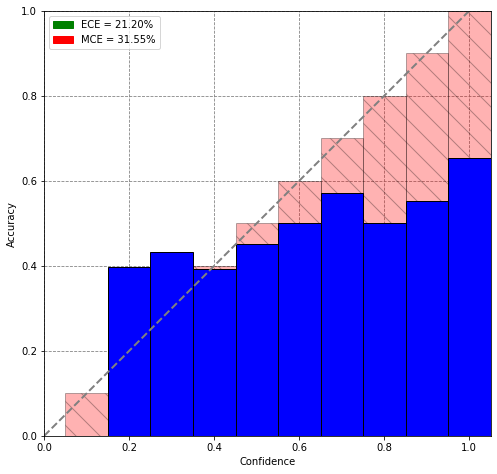

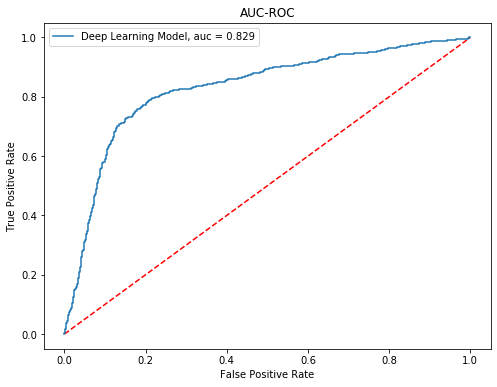

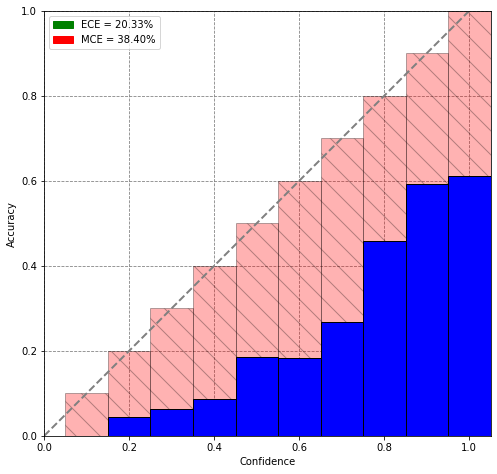

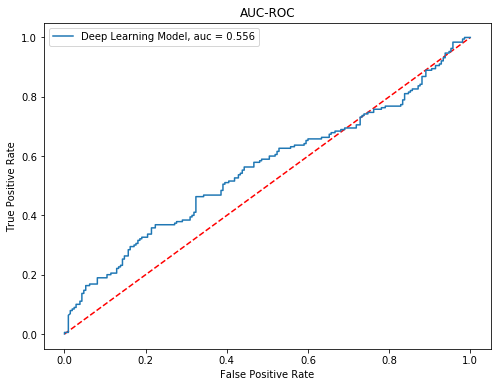

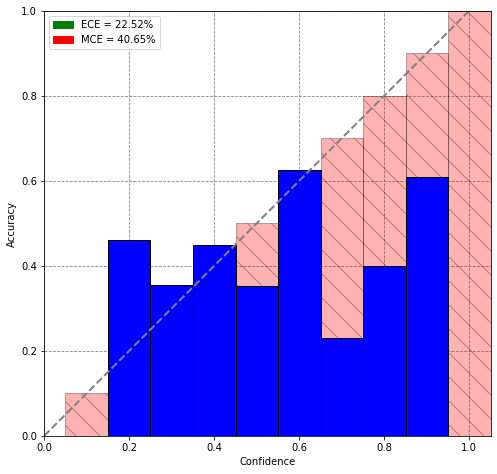

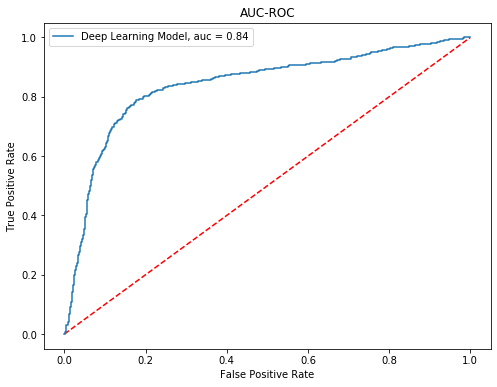

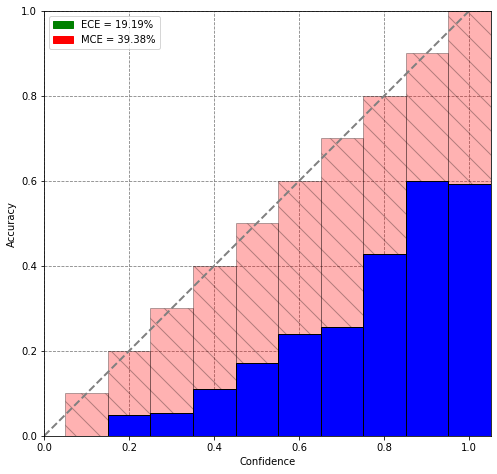

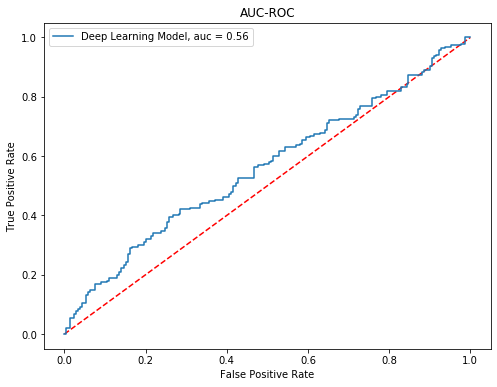

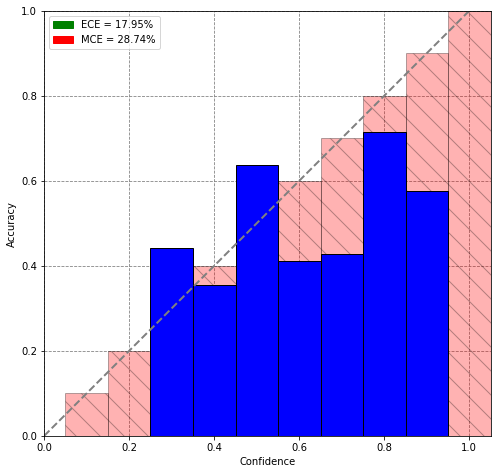

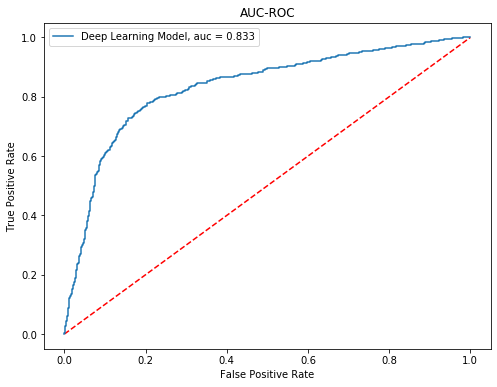

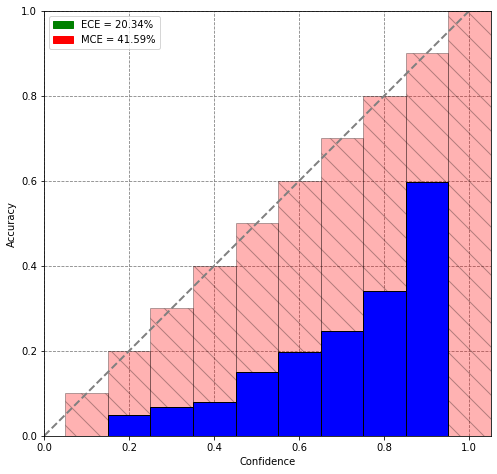

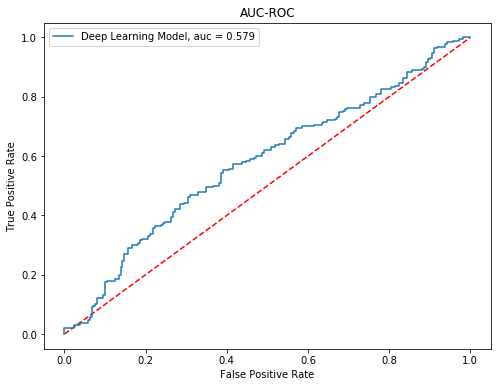

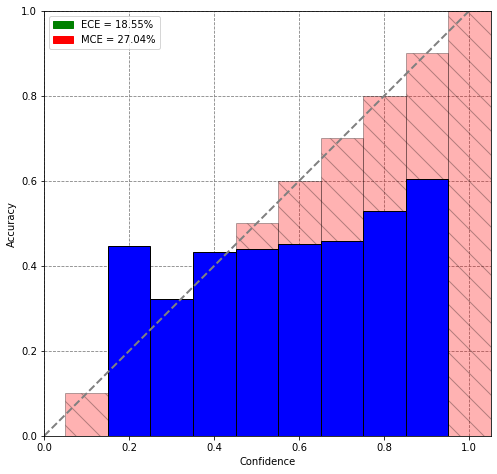

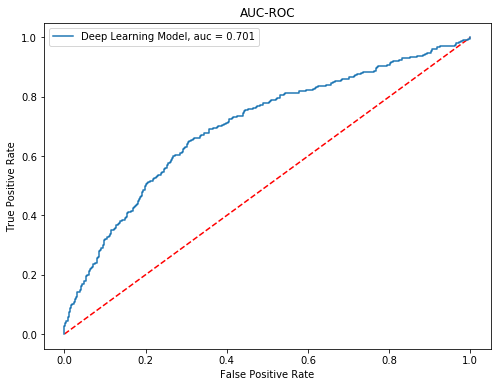

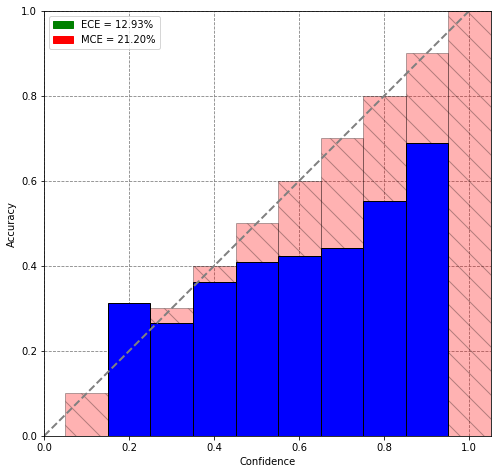

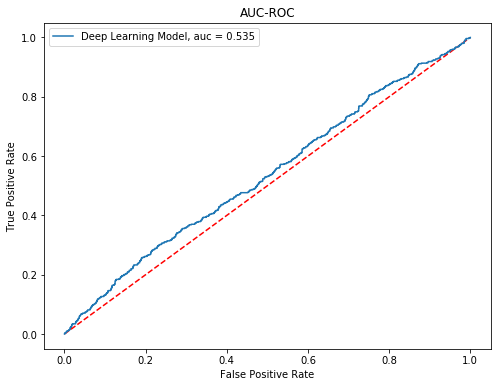

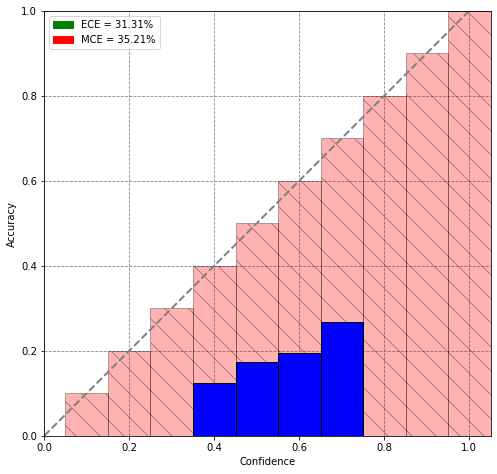

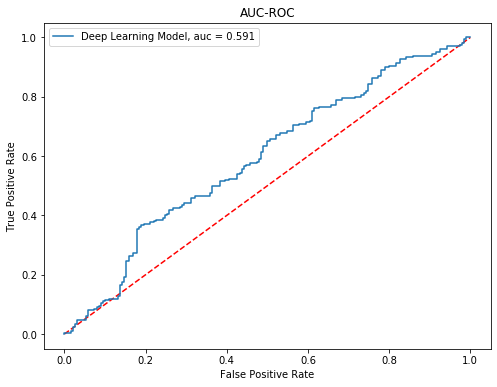

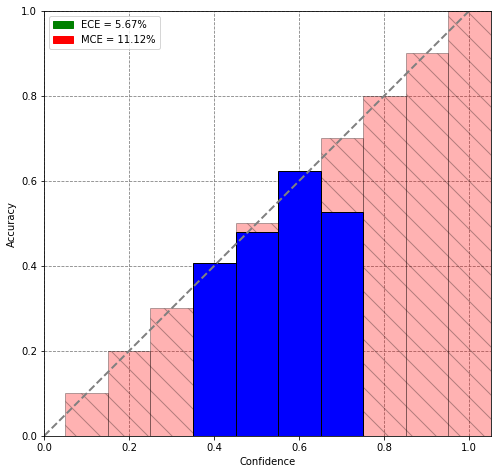

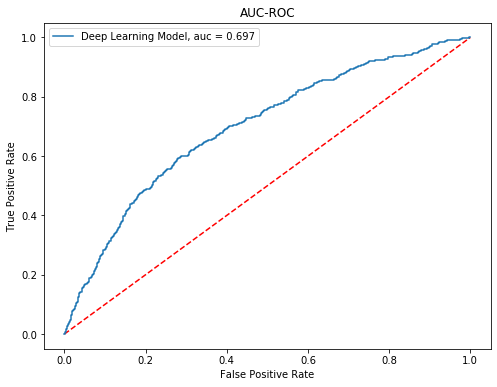

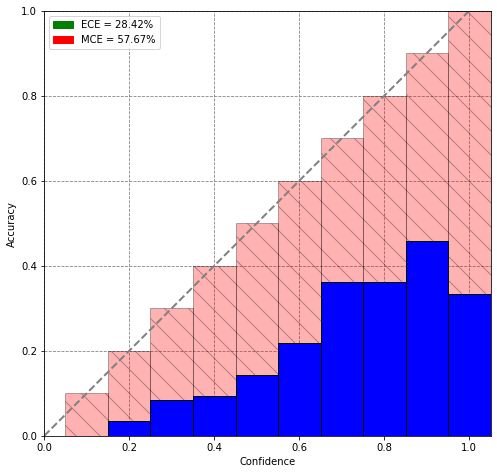

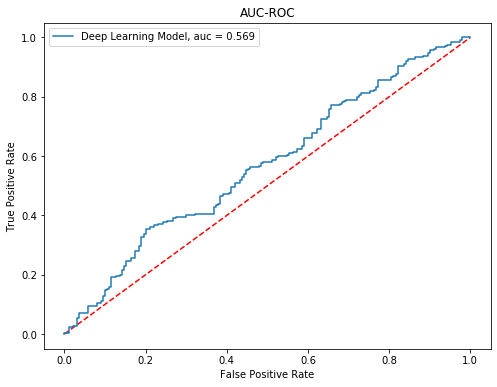

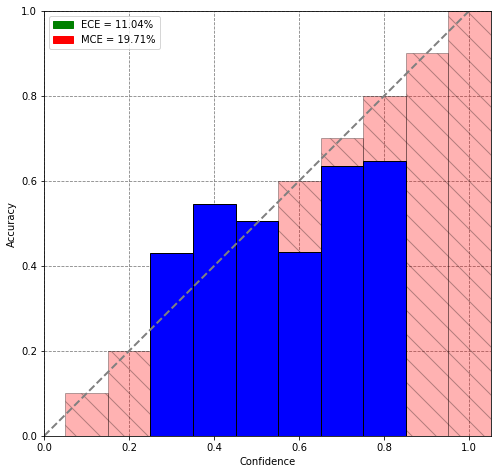

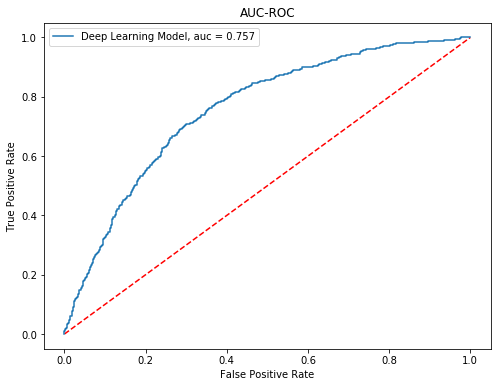

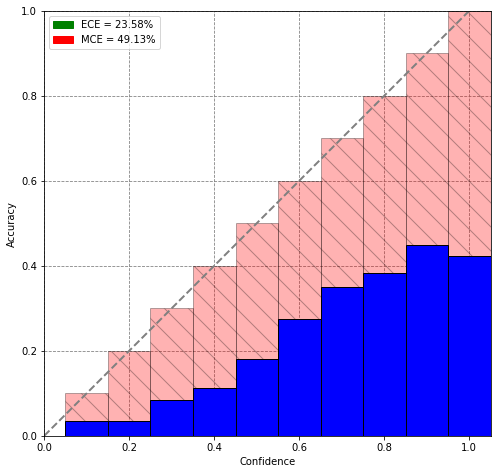

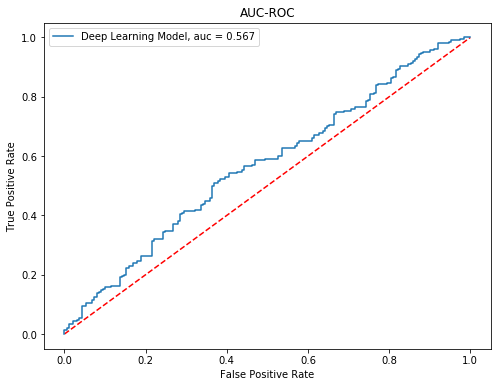

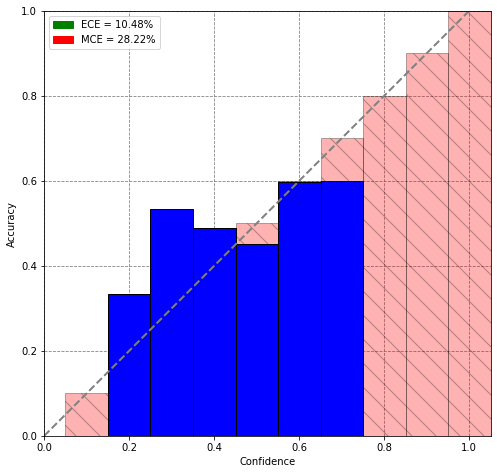

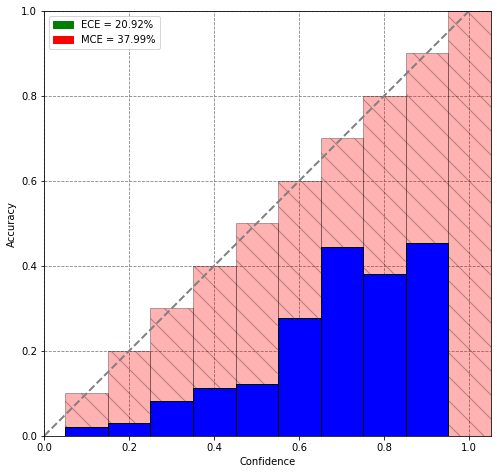

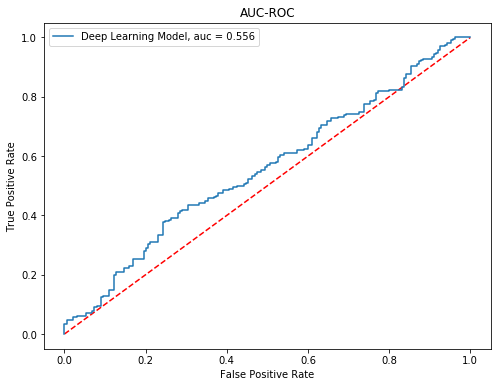

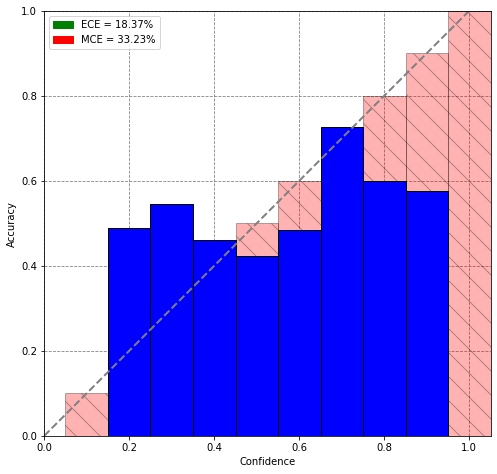

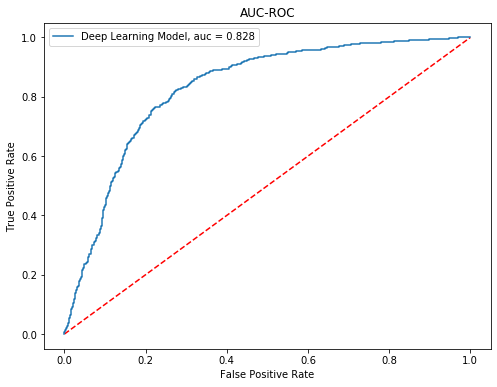

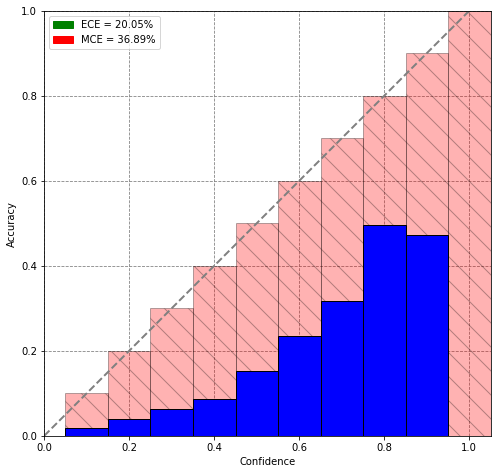

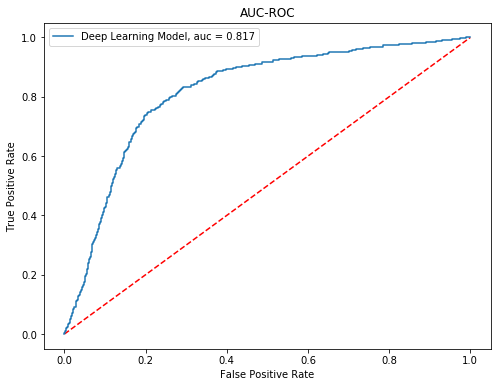

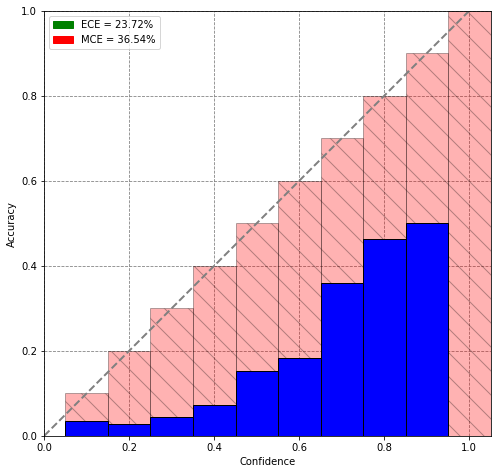

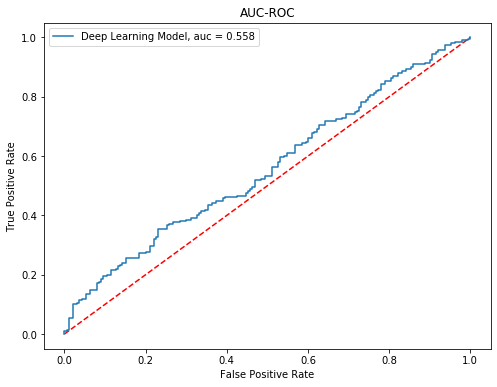

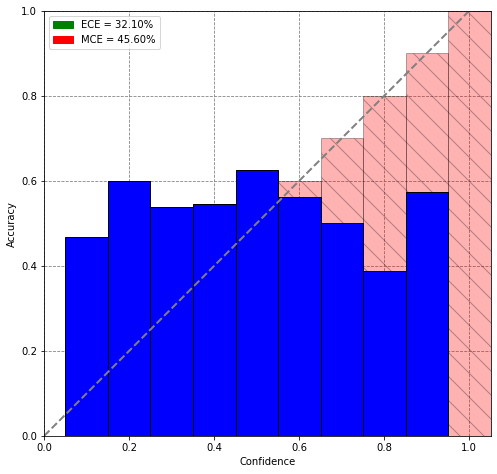

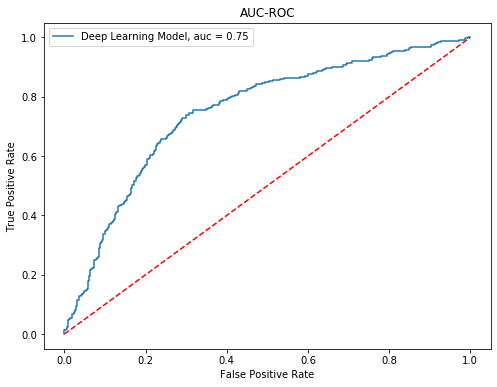

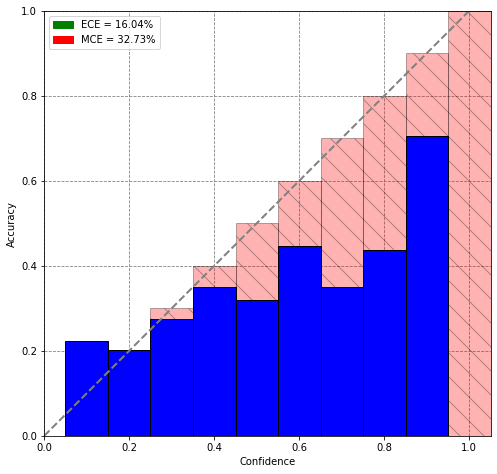

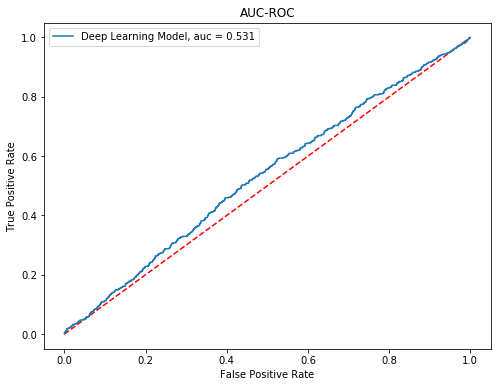

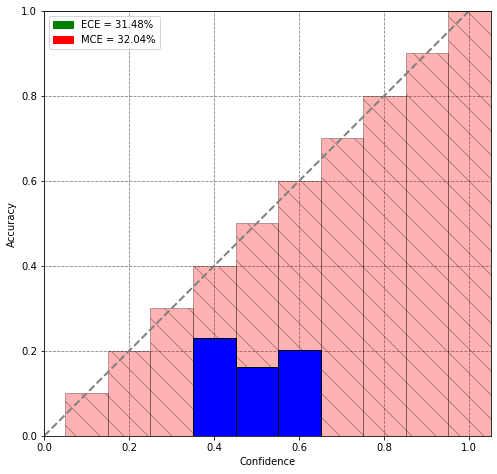

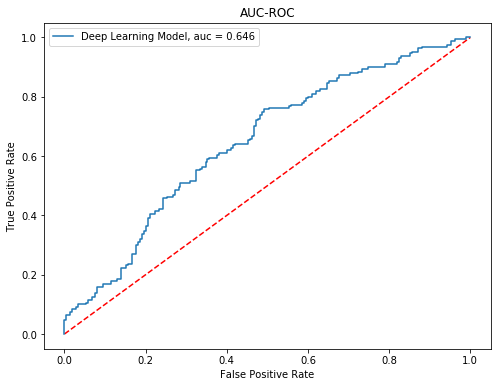

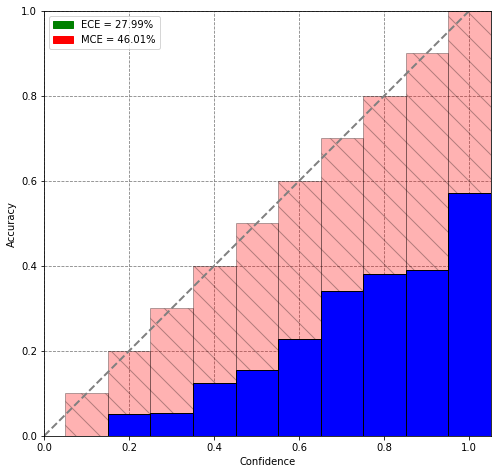

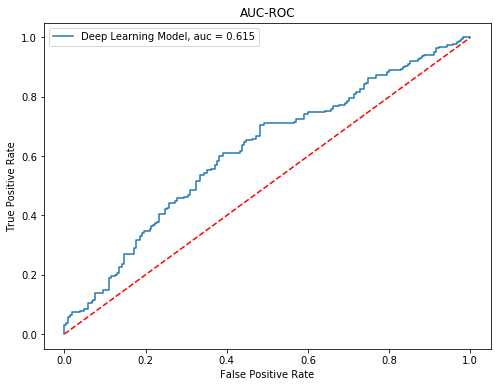

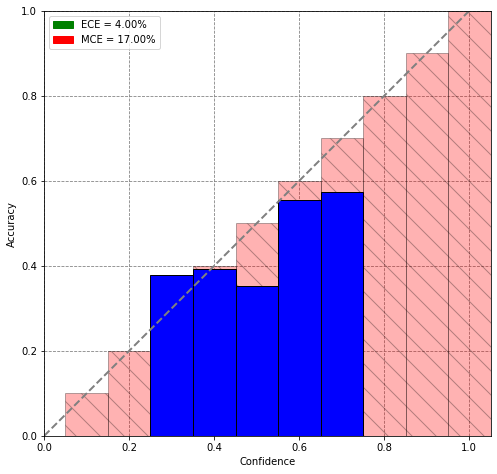

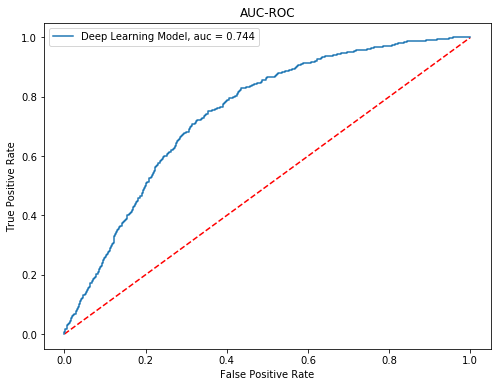

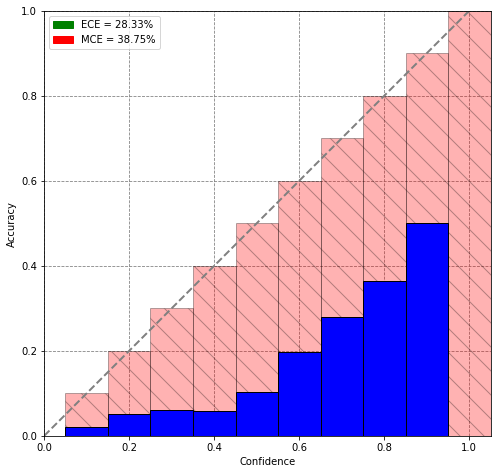

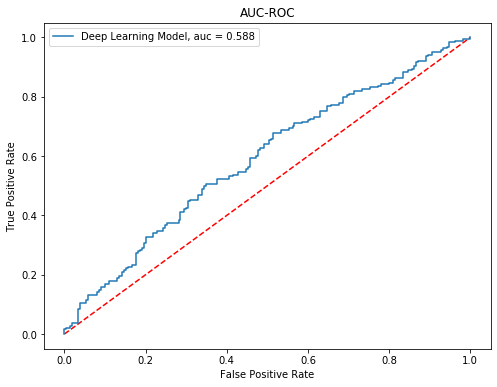

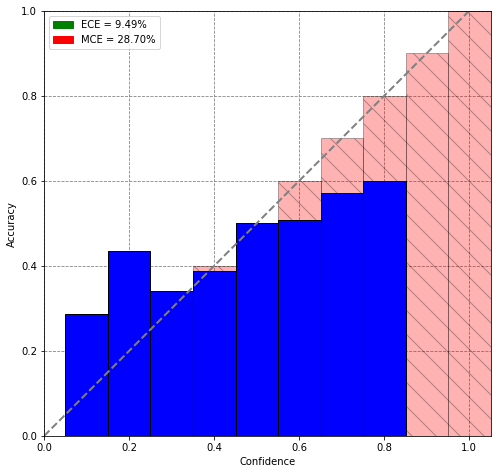

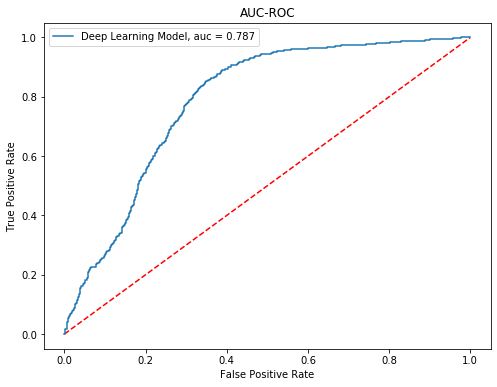

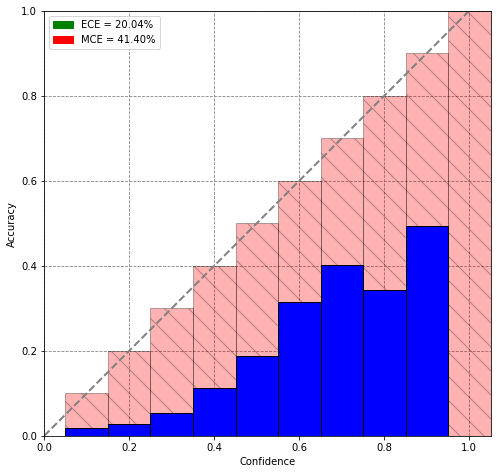

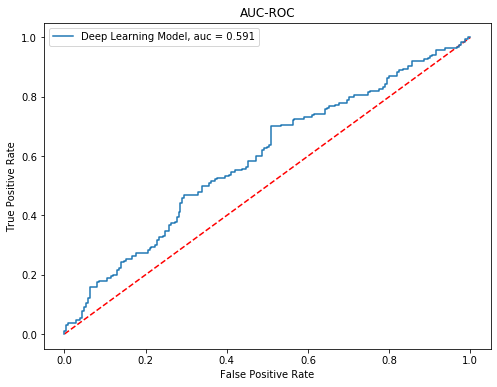

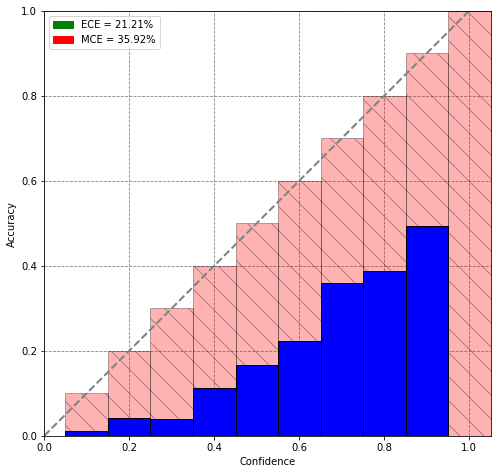

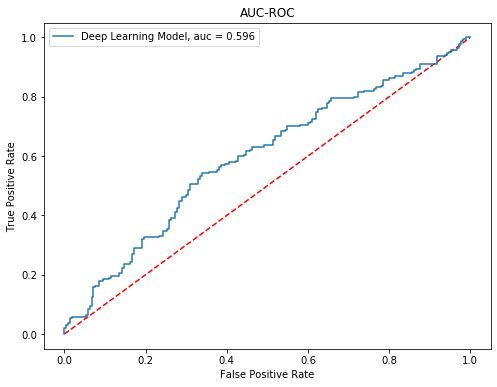

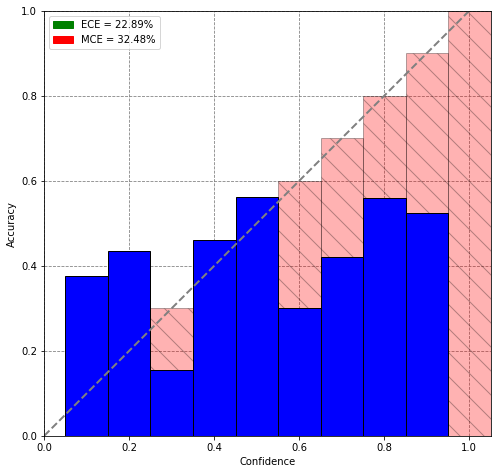

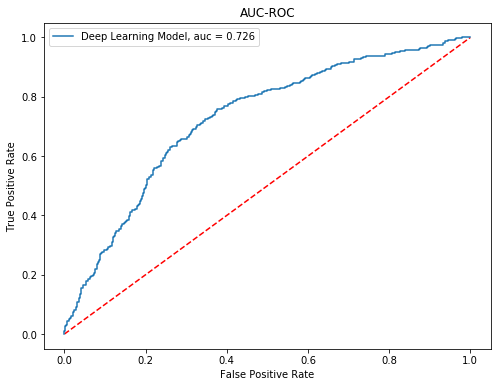

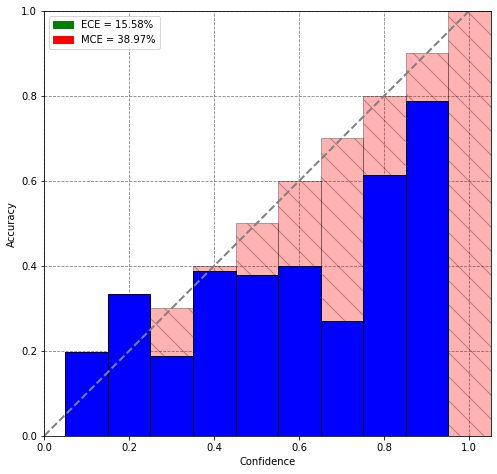

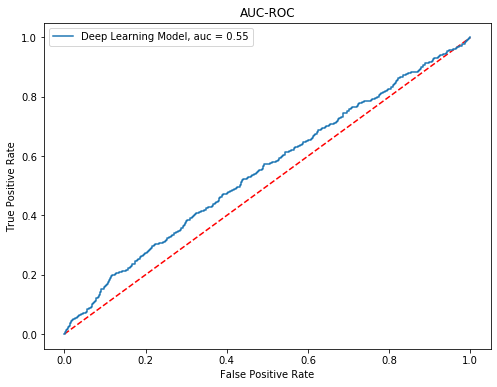

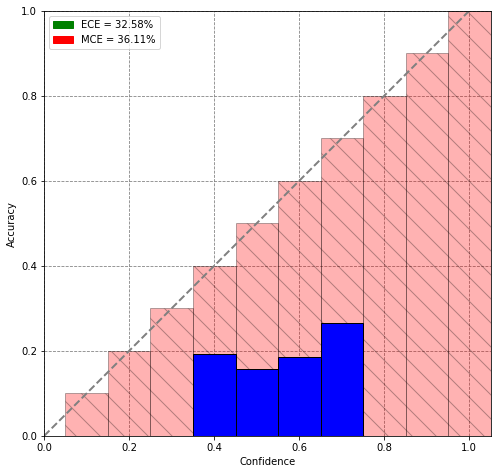

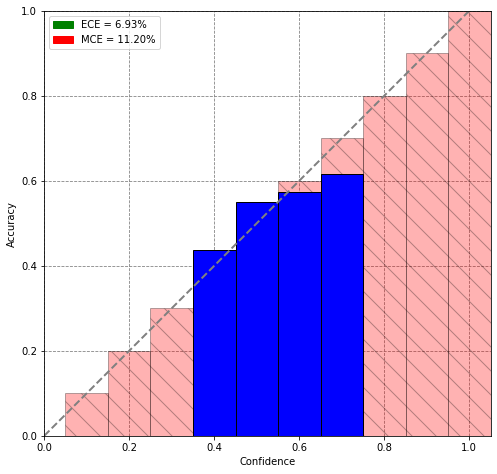

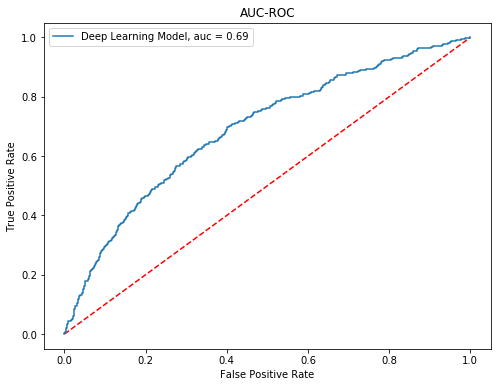

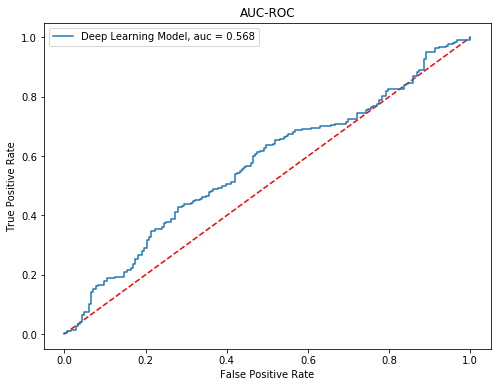

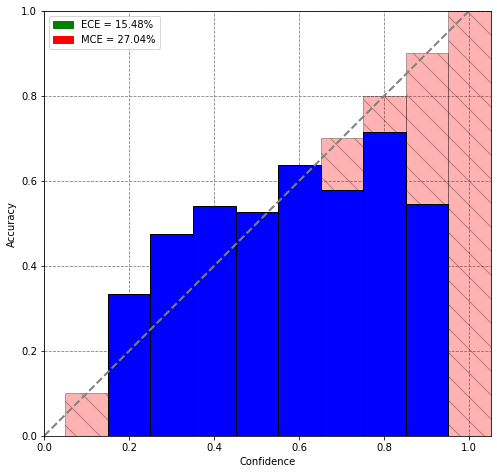

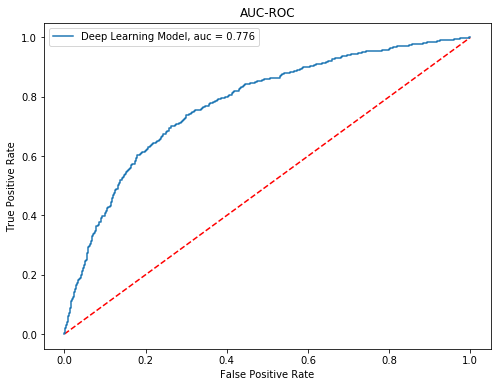

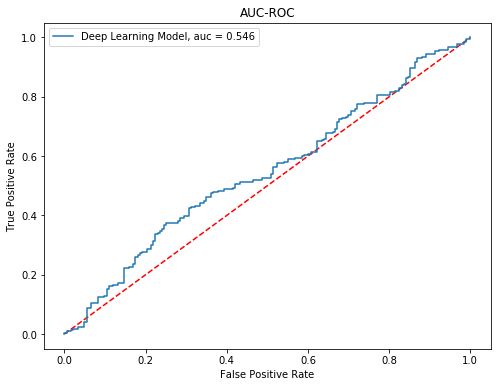

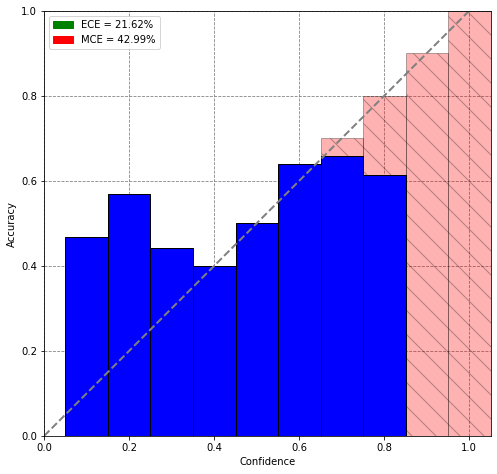

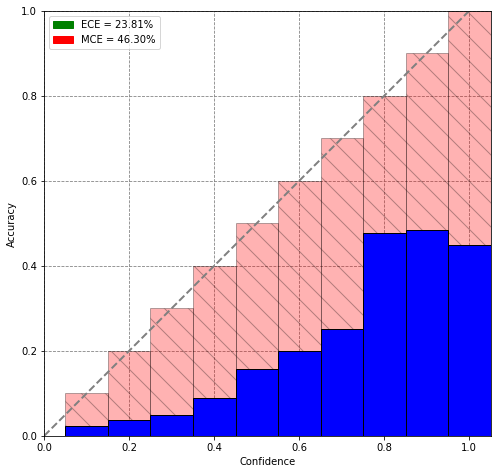

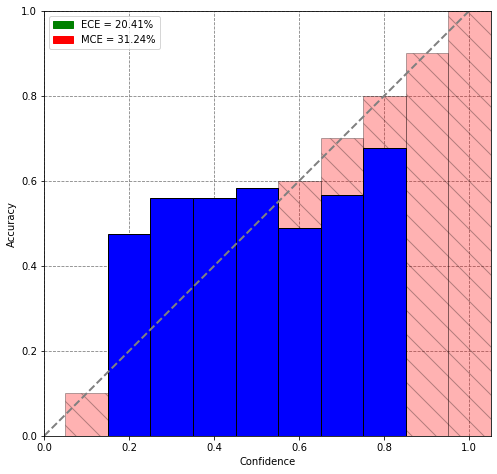

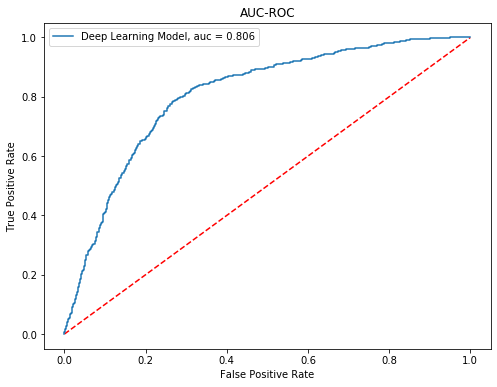

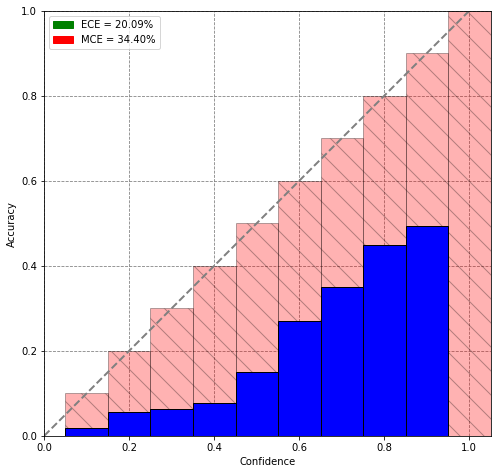

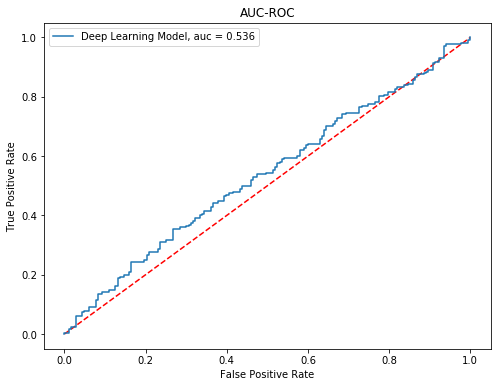

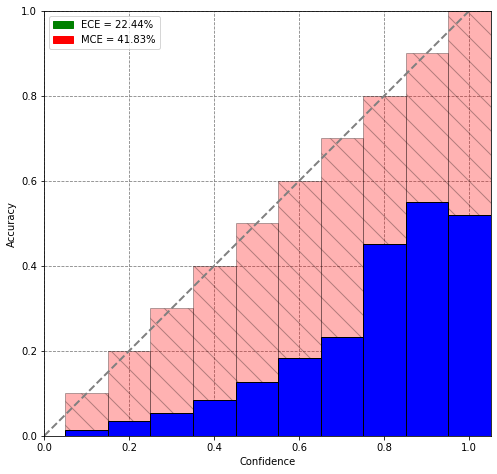

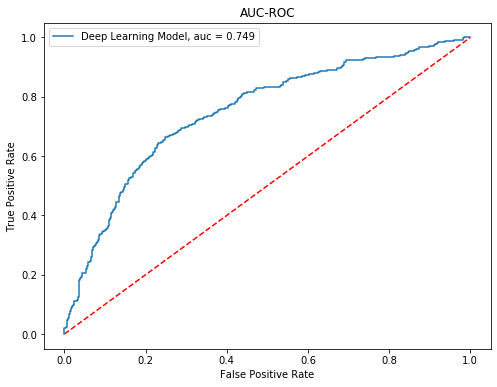

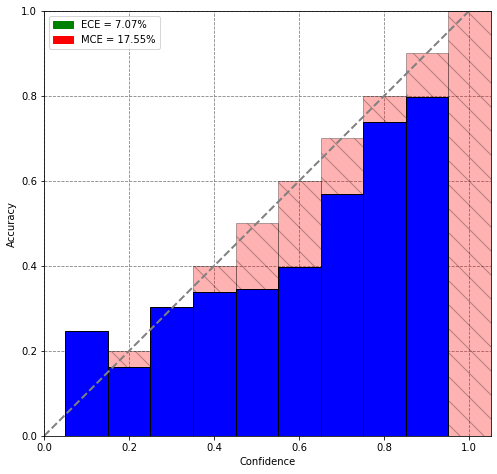

In [36]:
if radio_input7.value=='No CV':
    cv=0
elif radio_input7.value=='5-fold CV':
    cv=int(5)
elif radio_input7.value=='10-fold CV':
    cv=int(10)
    
if data_icu:
    model=dl_train.DL_models(diag_flag,proc_flag,out_flag,chart_flag,med_flag,False,radio_input6.value,cv,oversampling=radio_input8.value=='True',model_name='attn_icu_read',train=True)
else:
    model=dl_train.DL_models(diag_flag,proc_flag,False,False,med_flag,lab_flag,radio_input6.value,cv,oversampling=radio_input8.value=='True',model_name='attn_icu_read',train=True)

### EVALUATION AS STANDALONE MODULE
Below cell shows an exaple of how evaluation module can be used as a standalone module.

evaluation.Loss class can be instantiated and model output and ground truth can be passed to it to obtain results.

In the example below we captured model output and ground truth in a file and used that file to read the data.

In function definition ***loss(prob,truth,logits,False)***

prob -> List of Output predicted probabilities of case being positive

truth -> List of ground truth labels

logits -> List of logits obtained from last fully connected layer before applying softmax.sigmoid function in the model.

======= TESTING ========
BCE Loss: 1.38
AU-ROC: 0.61
AU-PRC: 0.20
AU-PRC Baaseline: 0.13
Accuracy: 0.57
Precision: 0.17
Recall: 0.55
Specificity: 0.57
NPV: 0.89
ECE: 0.36
MCE: 0.38


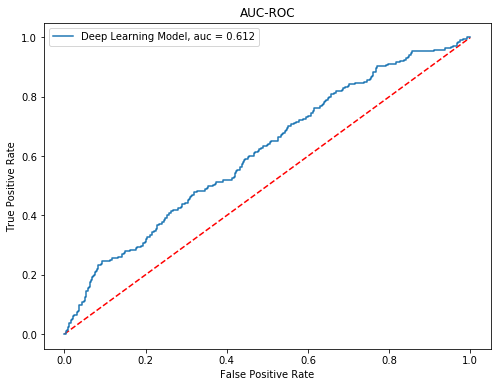

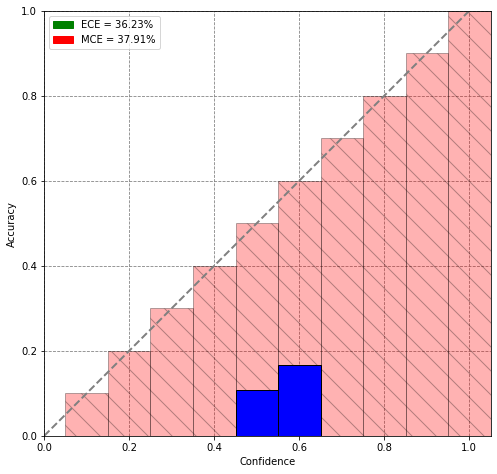

In [568]:
if torch.cuda.is_available():
    device='cuda:0'
#device='cpu'
loss=evaluation.Loss(device,acc=True,ppv=True,sensi=True,tnr=True,npv=True,auroc=True,aurocPlot=True,auprc=True,auprcPlot=True,callb=True,callbPlot=True)
with open("./data/output/outputDict", 'rb') as fp:
    outputDict=pickle.load(fp)
prob=list(outputDict['Prob'])
truth=list(outputDict['Labels'])
logits=list(outputDict['Logits'])
#print(torch.tensor(prob))
print("======= TESTING ========")
loss(prob,truth,logits,train=False,standalone=True)


### 11. FAIRNESS EVALUATION
In train and testing step we save output files in **./data/output/** folder.

This file conatins list of demographic variables included in training and testing of the model.

It also contains the ground truth labels and predicted probability for each sample.

We use the above saved data to perform fairness evaluation of the results obtained from model testing.

This module can be used as stand-alone module also.

Please create a file that contains predicted probabilites form the last sigmoid layer in column named **Prob** and
ground truth labels for each sample in column named **Labels**.

In [569]:
fairness.fairness_evaluation(inputFile='outputDict',outputFile='fairnessReport')

### 12. MODEL CALLIBRATION

Please run below cell if you want to callibrate predicted probabilites of the model on test data.
It will use the output saved during the testing of the model.

The file is saved in **./data/output/**.

This module can be used as stand-alone module also.

Please create a file that contain predicted logits form the last fully connected layer in column named **Logits** and <br>ground truth labels for each sample in a column named **Labels**.

BEFORE CALLIBRATION
BCE Loss: 1.38
AU-ROC: 0.61
AU-PRC: 0.20
AU-PRC Baaseline: 0.13
Accuracy: 0.57
Precision: 0.17
Recall: 0.55
Specificity: 0.57
NPV: 0.89
ECE: 0.36
MCE: 0.38
AFTER CALLIBRATION
BCE Loss: 1.38
AU-ROC: 0.61
AU-PRC: 0.20
AU-PRC Baaseline: 0.13
Accuracy: 0.57
Precision: 0.17
Recall: 0.55
Specificity: 0.57
NPV: 0.89
ECE: 0.36
MCE: 0.38


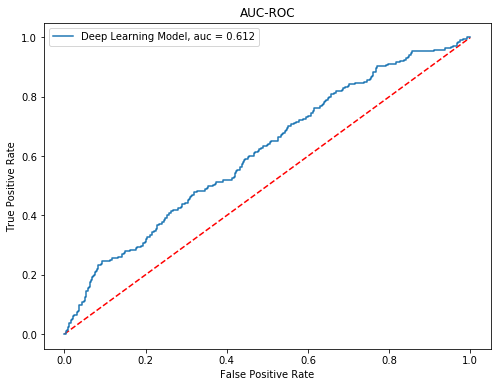

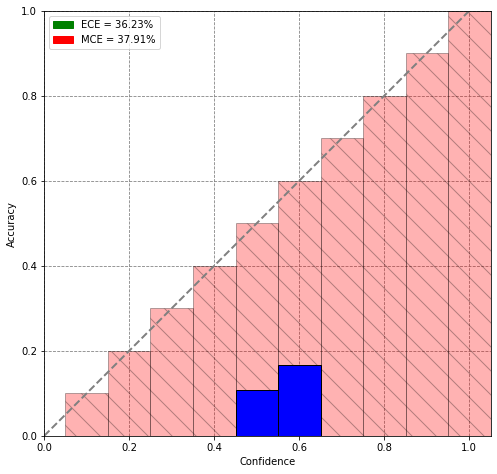

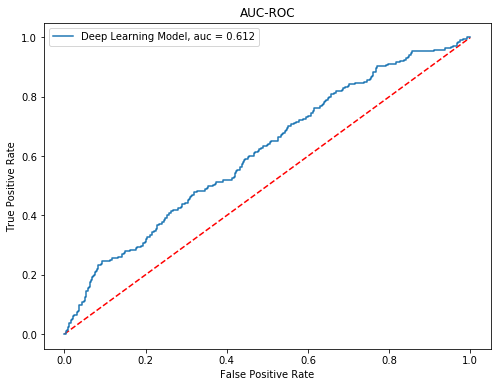

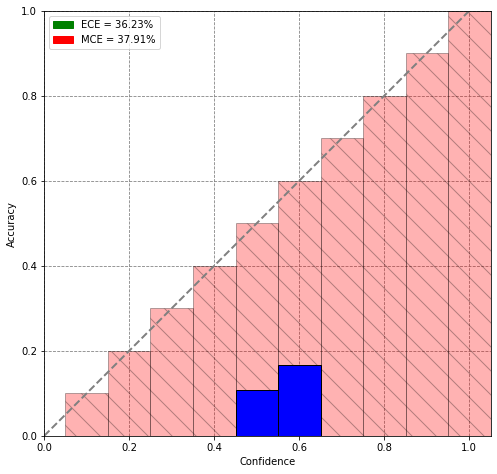

In [586]:
callibrate_output.callibrate(inputFile='outputDict',outputFile='callibratedResults')